In [3]:
import numpy as np
import pandas as pd
from sklearn import *
from scipy.stats import *
from framework.data import *
from framework.draw import *
from matplotlib import pyplot as plt

In [4]:
data = pd.read_sql('''
select `Graduation year`, `Primary specialty`,
  `Total Performance Score`
from hospital_practitioners
where `Graduation year` > 1960;
''', sql)

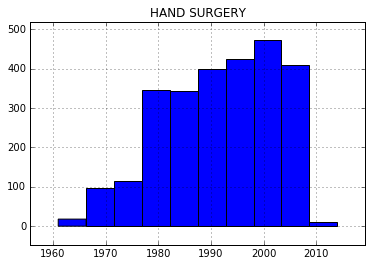

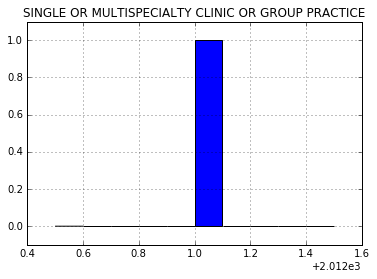

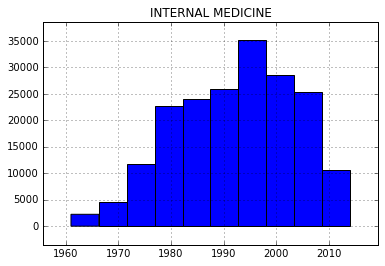

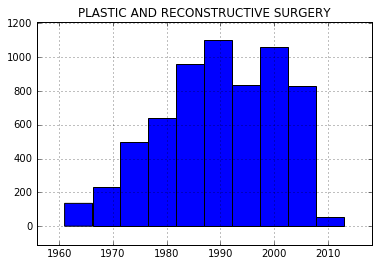

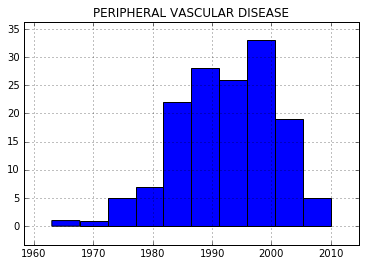

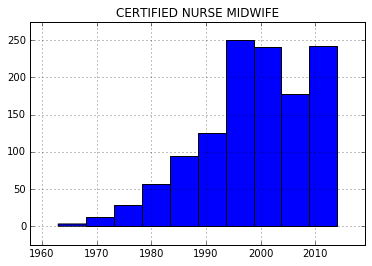

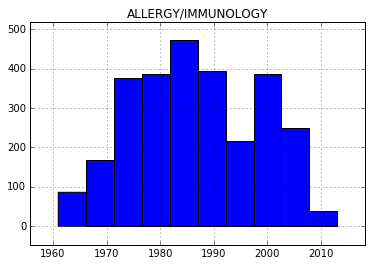

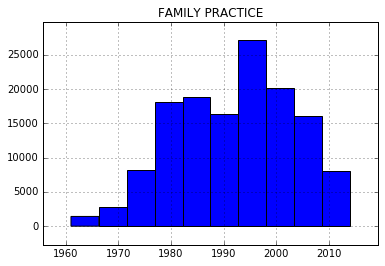

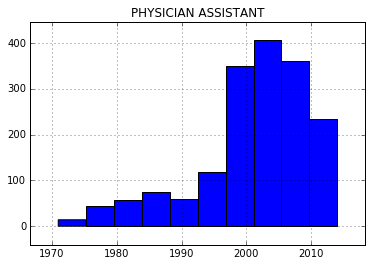

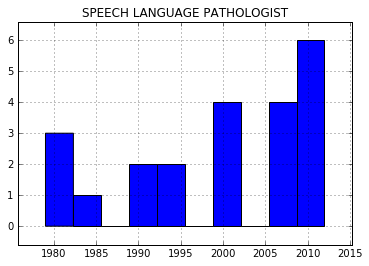

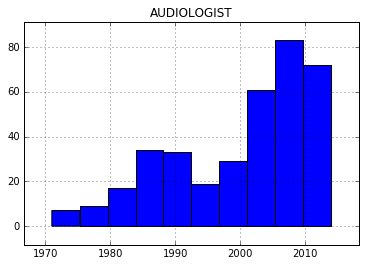

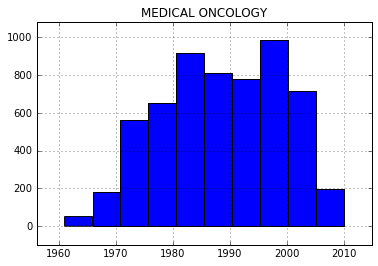

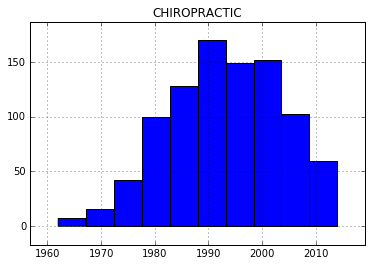

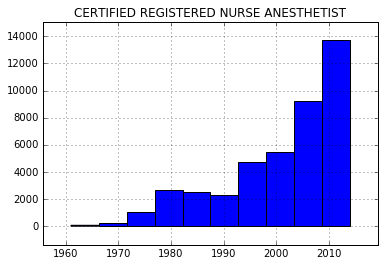

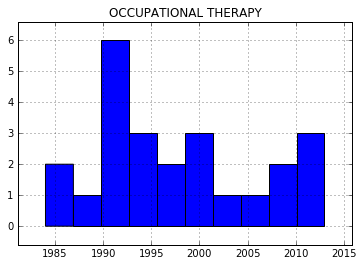

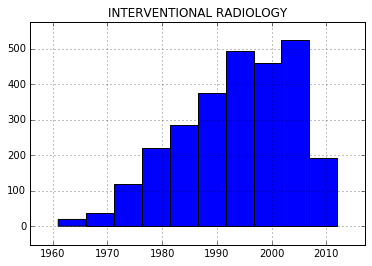

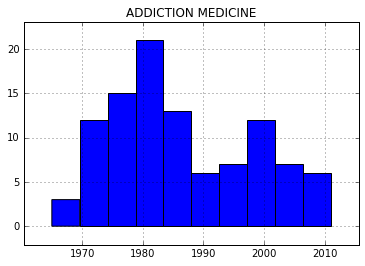

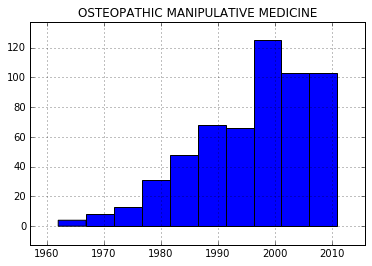

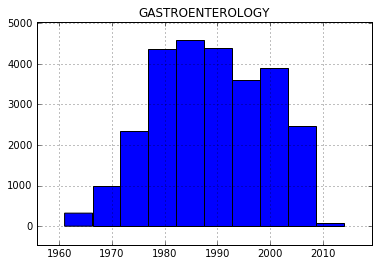

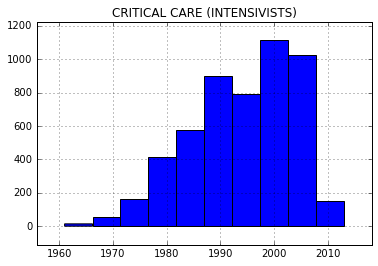

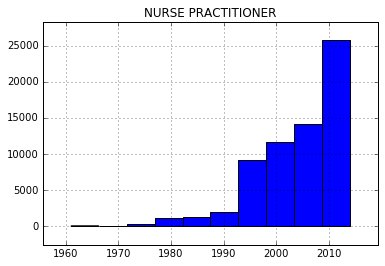

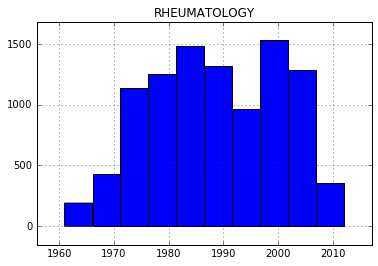

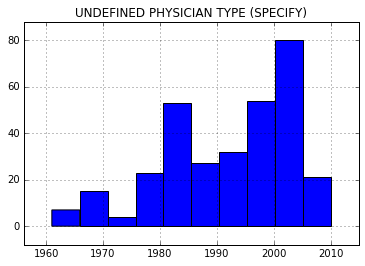

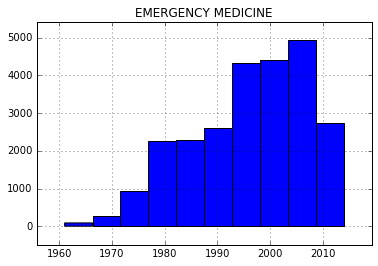

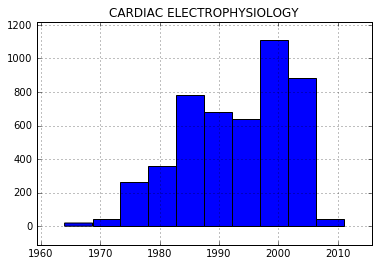

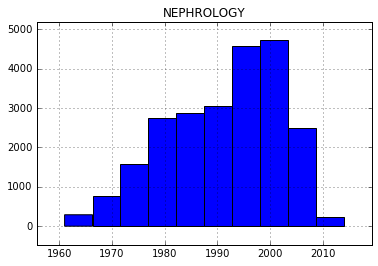

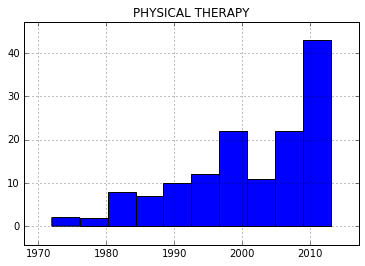

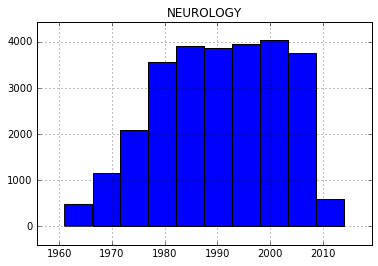

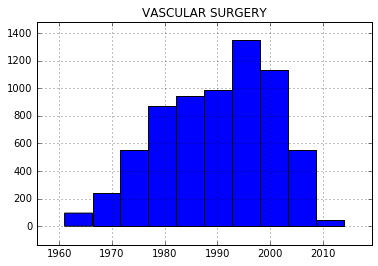

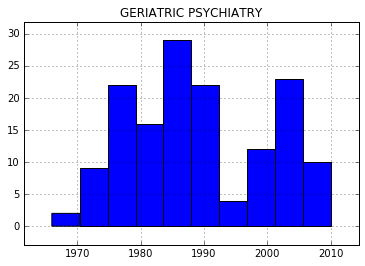

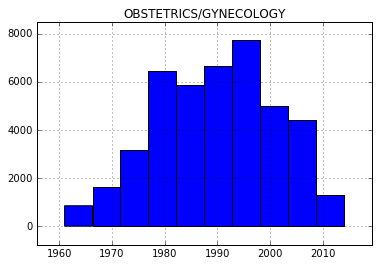

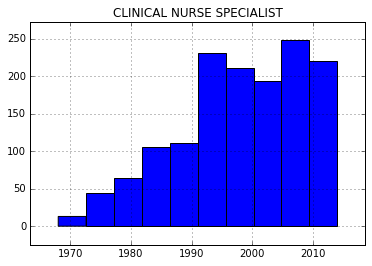

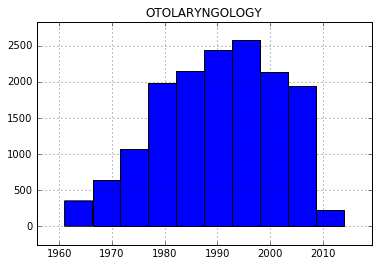

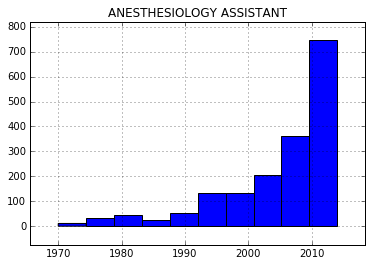

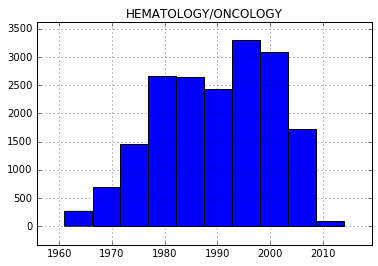

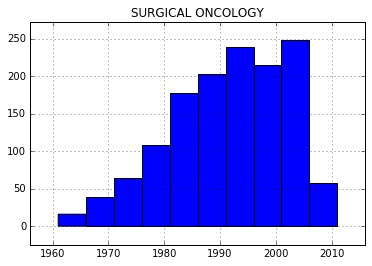

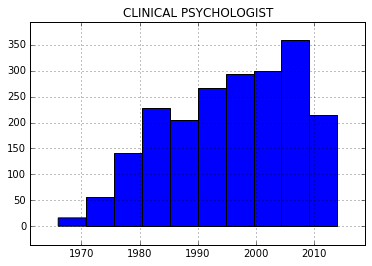

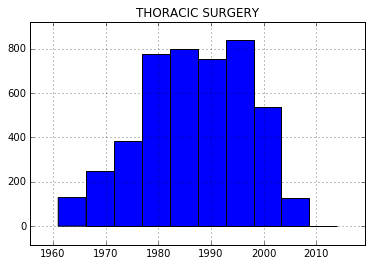

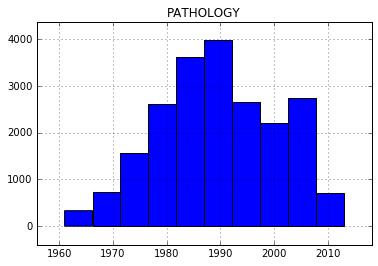

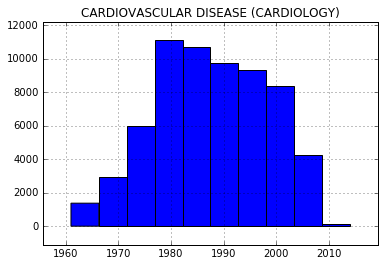

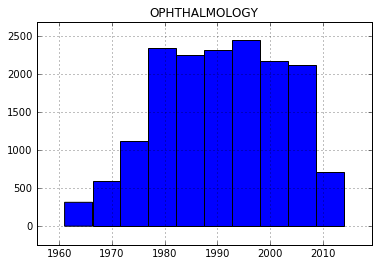

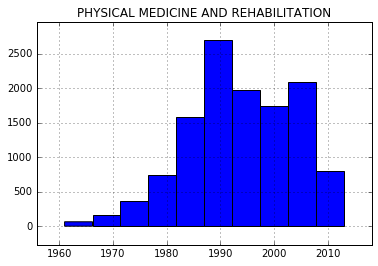

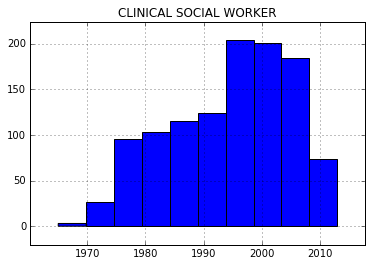

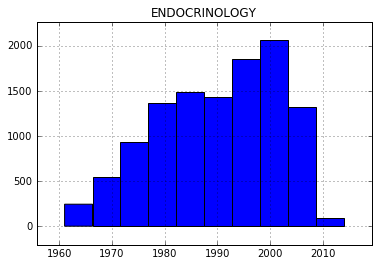

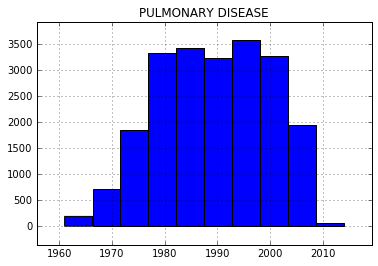

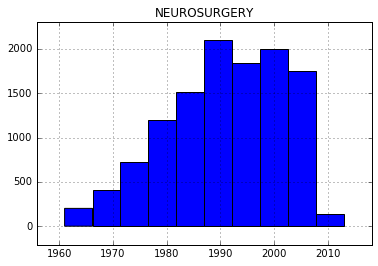

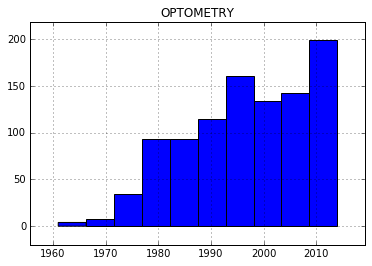

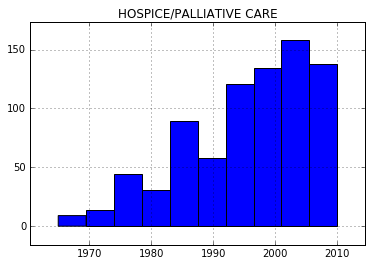

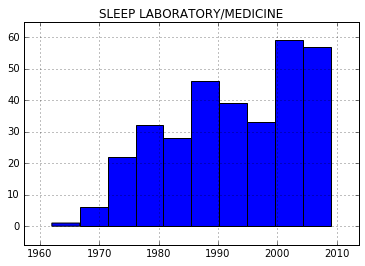

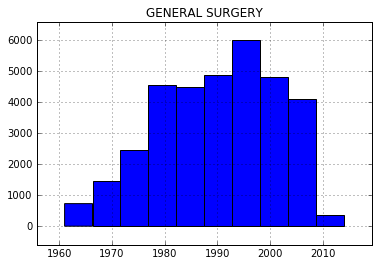

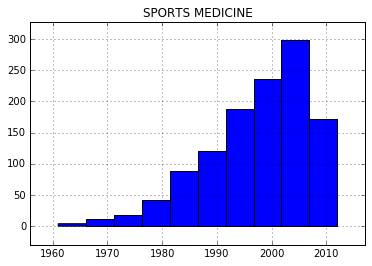

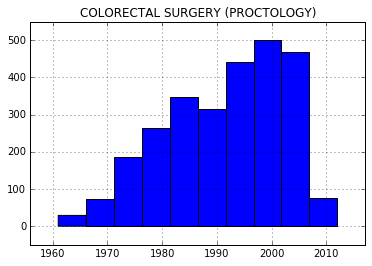

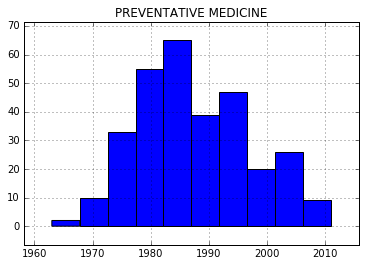

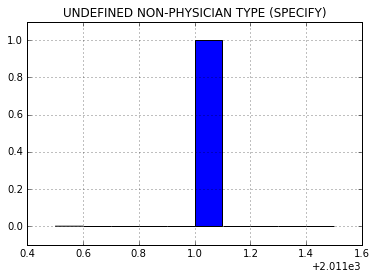

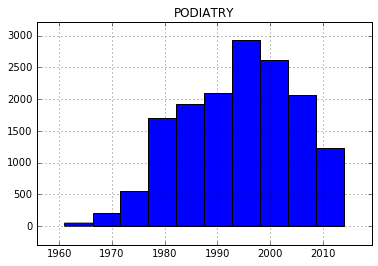

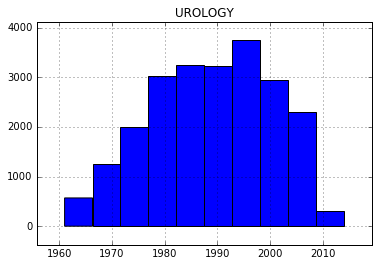

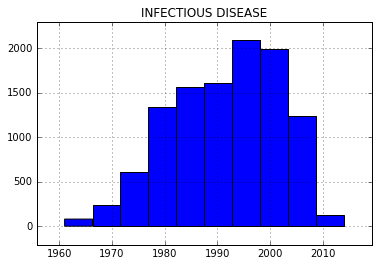

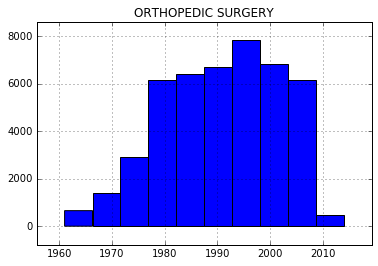

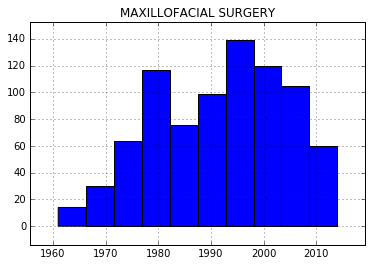

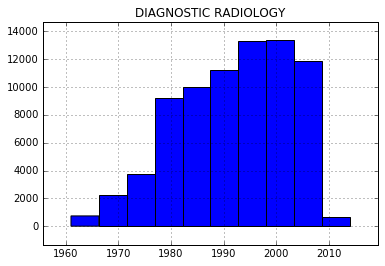

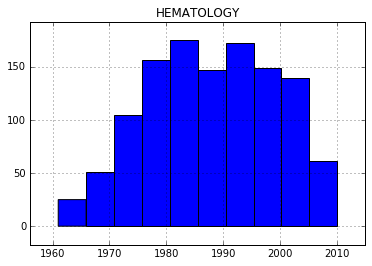

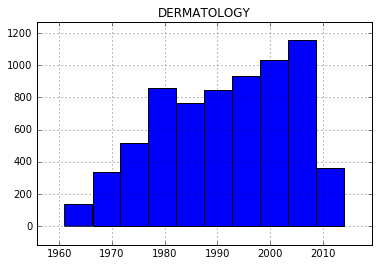

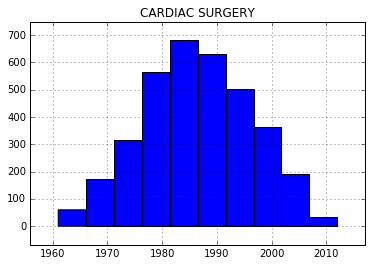

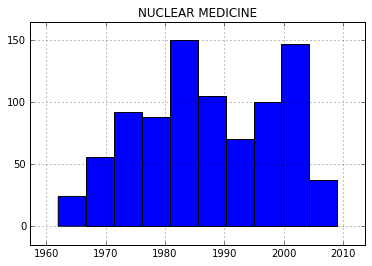

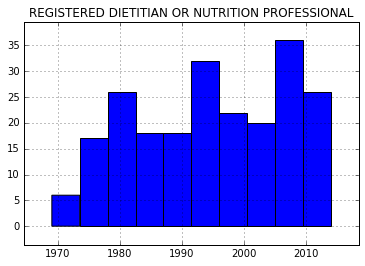

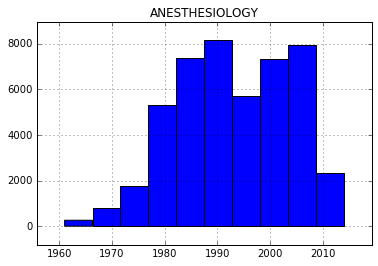

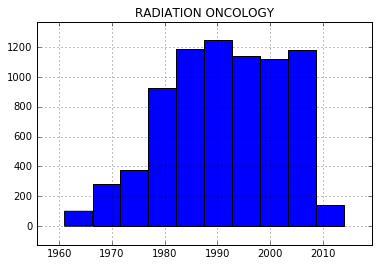

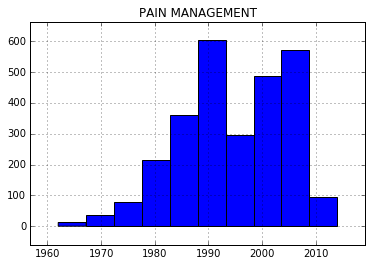

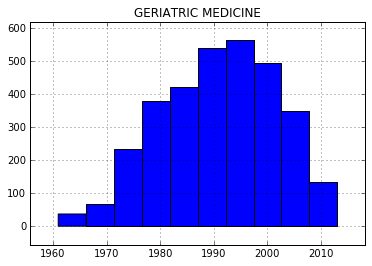

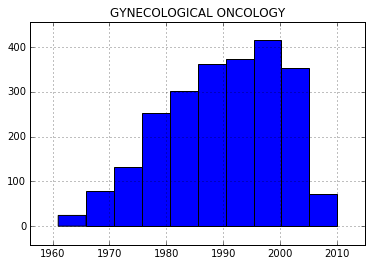

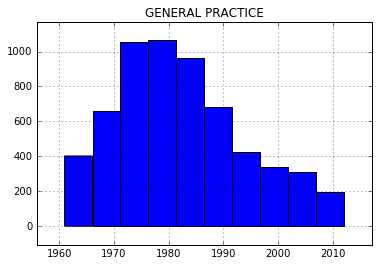

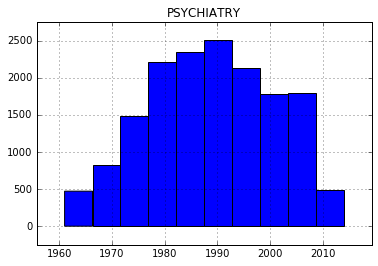

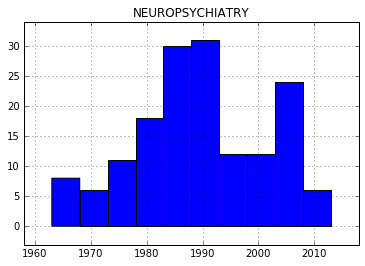

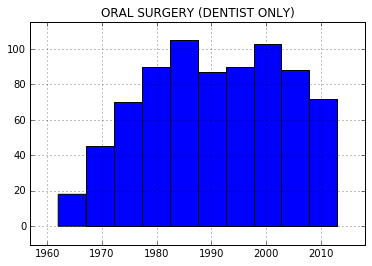

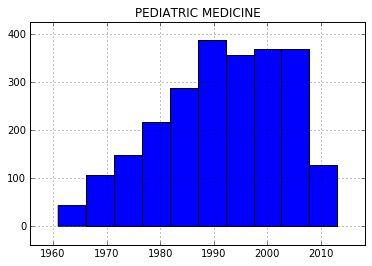

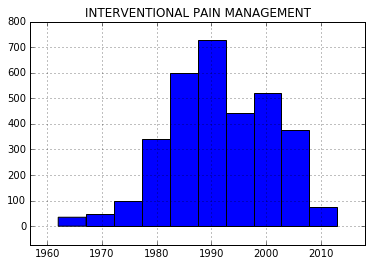

In [5]:
# The following code shows all specialties
for specialty, ind in data.groupby('Primary specialty').groups.items():
    #if specialty in []:
    data.ix[ind, 'Graduation year'].hist()
    draw(title=specialty, show=True) #save='%s-graduation.png' % (specialty)

In [8]:
# http://pandas.pydata.org/pandas-docs/stable/cookbook.html
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [9]:
df.ix[{0, 1}]

,AAA,BBB,CCC
0,4,10,100
1,5,20,50


In [10]:
df.ix[{0, 1}, 'BBB']

0    10
1    20
Name: BBB, dtype: int64

In [12]:
tem = df.ix[{0, 1}, 'BBB'];
type(tem)

pandas.core.series.Series

In [13]:
tem.count

<bound method Series.count of 0    10
1    20
Name: BBB, dtype: int64>

In [14]:
tem.count()

2

In [15]:
tem.hist()

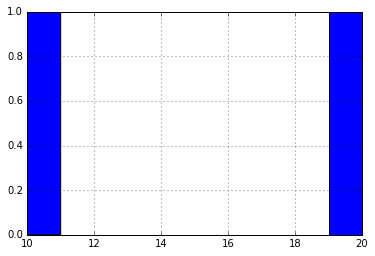

In [16]:
plt.clf()
tem.hist()
plt.show()


In [19]:
# The following will look at just one specialty
for specialty, ind in data.groupby('Primary specialty').groups.items():
    if specialty in ['FAMILY PRACTICE']:
        tem = data.ix[ind, 'Graduation year']



In [20]:
tem.shape


(136988,)

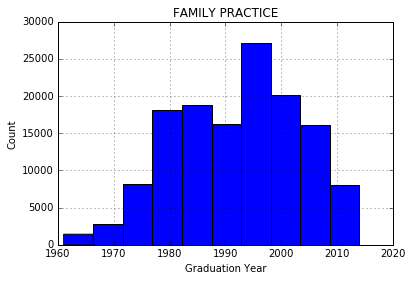

In [23]:
# Now plot the histogram
plt.clf()
this_hist = tem.hist()
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('FAMILY PRACTICE')
plt.show()

In [24]:
type(this_hist)

matplotlib.axes._subplots.AxesSubplot

In [25]:
# http://stackoverflow.com/questions/17148787/are-there-functions-to-retrieve-the-histogram-counts-of-a-series-in-pandas
type(tem)

pandas.core.series.Series

In [26]:
counts, bins = np.histogram(tem)

In [27]:
counts

array([ 1422,  2848,  8121, 18157, 18792, 16292, 27094, 20111, 16061,  8090])

In [29]:
# The bin sizes are given here
bins

array([ 1961. ,  1966.3,  1971.6,  1976.9,  1982.2,  1987.5,  1992.8,
        1998.1,  2003.4,  2008.7,  2014. ])

In [30]:
# You can use specific bins by using a command like np.histogram(tem, my_bins). See later.

# NOTE: the following gives an error:
plt.bar(bins, counts, width=1)
ValueError: incompatible sizes: argument 'height' must be length 11 or scalar

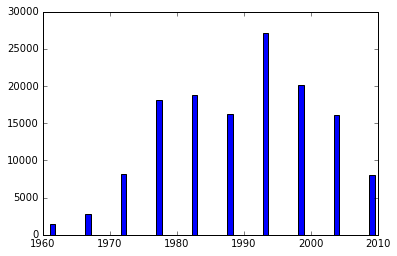

In [42]:
plt.bar(bins[:-1], counts)
plt.show()

In [43]:
# Now determine the max graduation year (most recent)
max_graduation_year = data['Graduation year'].max()

In [44]:
max_graduation_year

2014

In [51]:
# create bins for every 5 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_5_years = np.arange(1960, 2015, 5);
my_bins_5_years

array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])

In [52]:
counts, bins = np.histogram(tem, my_bins_5_years)

In [53]:
bins

array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])

In [54]:
counts

array([  808,  1959,  5593, 12067, 17573, 18109, 17419, 23686, 19139, 18081])

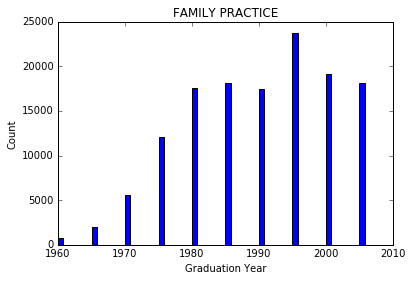

In [56]:
# Now plot the histogram
plt.clf()
counts, bins = np.histogram(tem, my_bins_5_years)
plt.bar(bins[:-1], counts)
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('FAMILY PRACTICE')
plt.show()

In [57]:
# create bins for every 2 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_2_years = np.arange(1960, 2015, 2);
my_bins_2_years

array([1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980,
       1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002,
       2004, 2006, 2008, 2010, 2012, 2014])

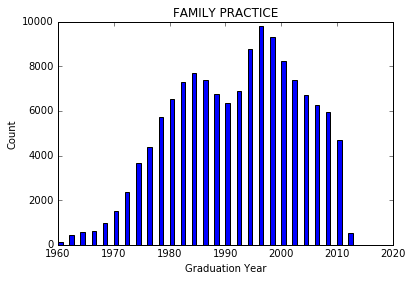

In [58]:
# Now plot the histogram
plt.clf()
counts, bins = np.histogram(tem, my_bins_2_years)
plt.bar(bins[:-1], counts)
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('FAMILY PRACTICE')
plt.show()

In [59]:
# create bins for every 1 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_1_years = np.arange(1960, 2015, 1);
my_bins_1_years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

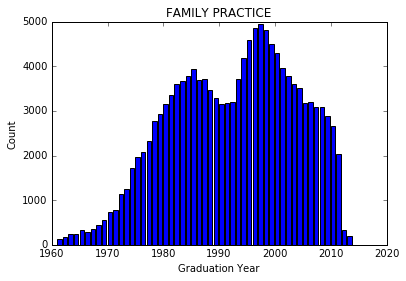

In [63]:
# Now plot the histogram
plt.clf()
counts, bins = np.histogram(tem, my_bins_1_years)
plt.bar(bins[:-1], counts)
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('FAMILY PRACTICE')
plt.show()

In [61]:
counts

array([   0,  137,  179,  240,  252,  337,  277,  360,  436,  549,  732,
        771, 1129, 1240, 1721, 1959, 2072, 2323, 2781, 2932, 3145, 3366,
       3610, 3669, 3783, 3935, 3696, 3709, 3477, 3292, 3158, 3176, 3189,
       3719, 4177, 4577, 4858, 4948, 4815, 4488, 4286, 3964, 3771, 3602,
       3516, 3176, 3198, 3082, 3089, 2883, 2653, 2033,  334,  187])

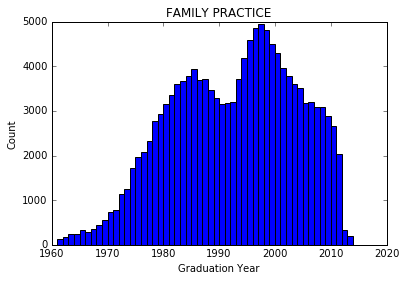

In [64]:
# Now plot the histogram
plt.clf()
counts, bins = np.histogram(tem, my_bins_1_years)
plt.bar(bins[:-1], counts, width=1)
plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('FAMILY PRACTICE')
plt.show()

In [65]:
sum(counts)

136988

In [75]:
# http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

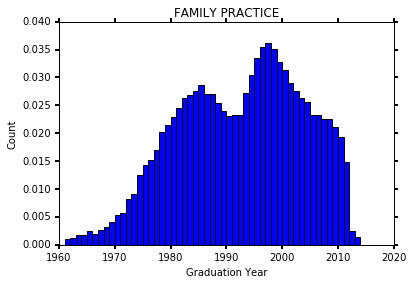

In [81]:
# Also create a normalized histogram, where the sum of the area under the curve is 1.

# Now plot the histogram
plt.clf()
counts, bins = np.histogram(tem, my_bins_1_years)

this_plot = plt.bar(bins[:-1], counts/sum(counts), width=1)

# http://stackoverflow.com/questions/14705904/matplotlib-ticks-thickness
# width=2 gives the right thickness    
ax = plt.gca()
ax.tick_params(width=2)

# http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax
ax.tick_params(axis='x', direction='out')

plt.xlabel('Graduation Year')
plt.ylabel('Count')
plt.title('FAMILY PRACTICE')
plt.show()

In [ ]:
# This will be the vector associated with the given specialty.
# Perhaps we can plot all these curves on one plot then.


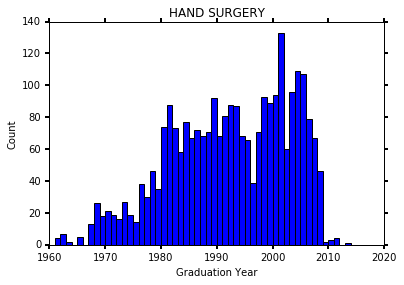

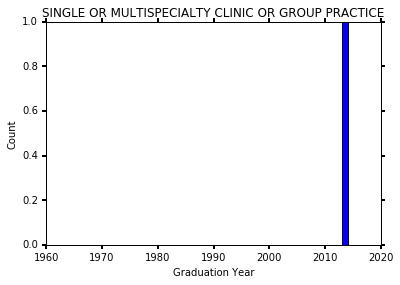

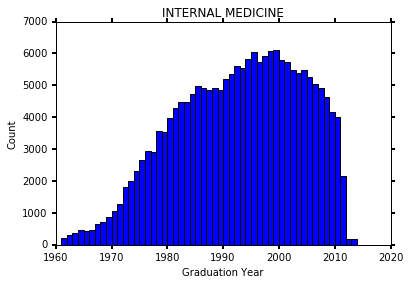

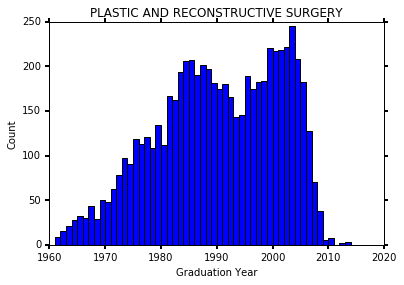

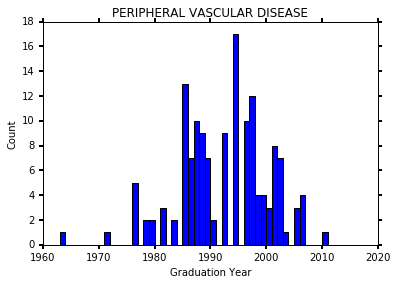

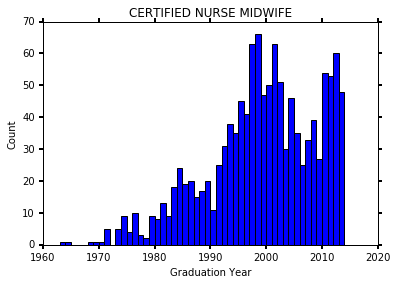

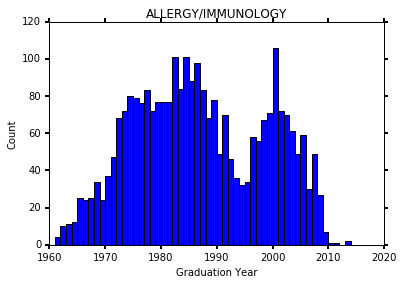

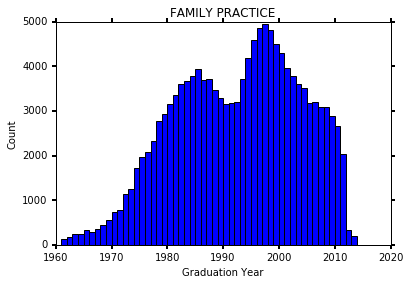

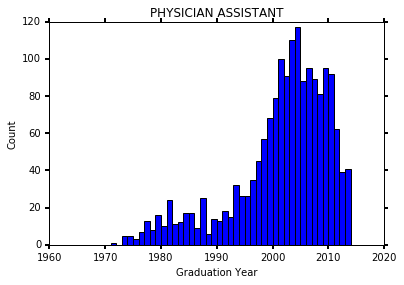

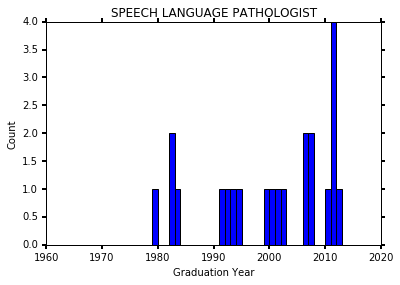

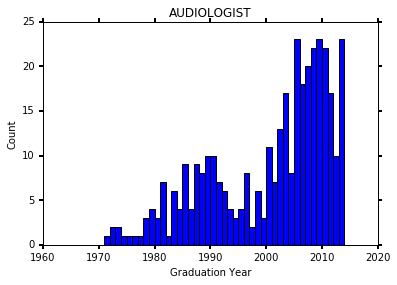

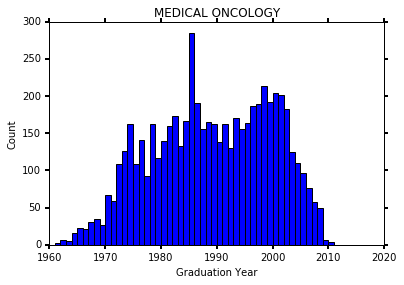

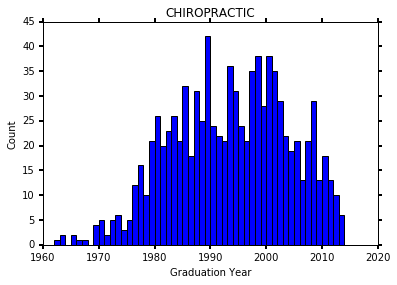

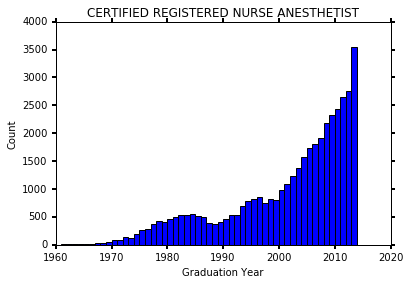

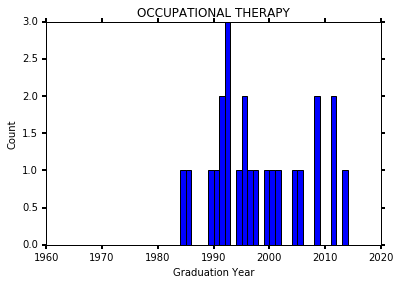

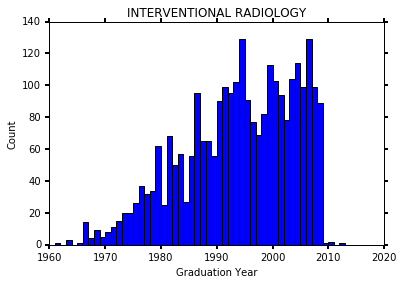

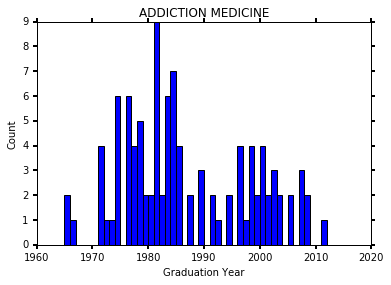

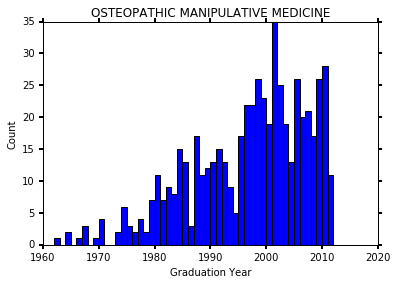

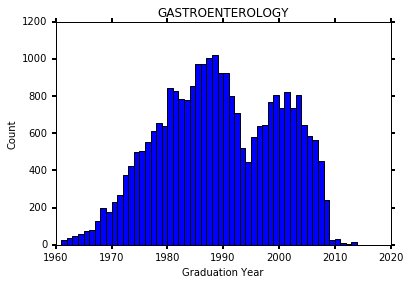

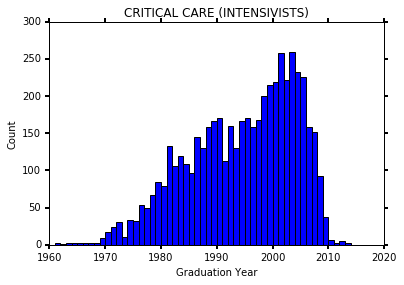

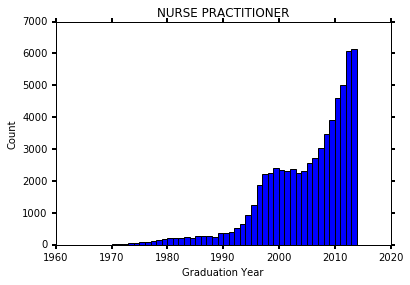

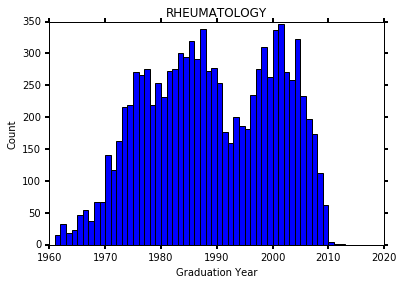

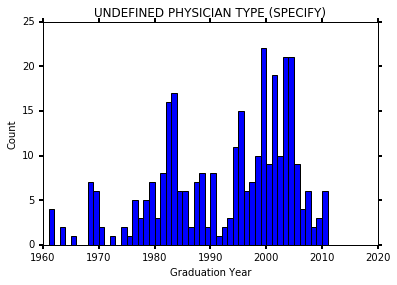

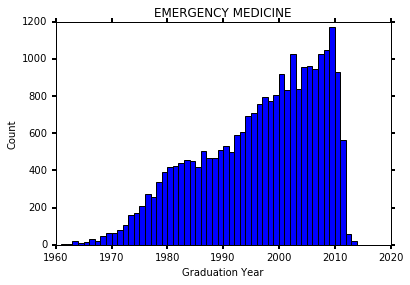

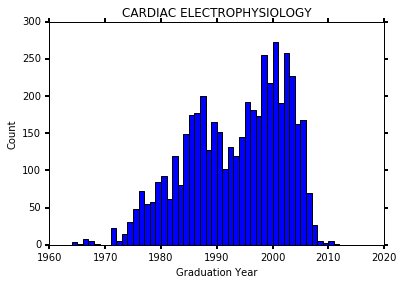

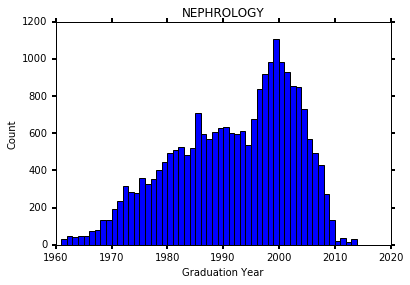

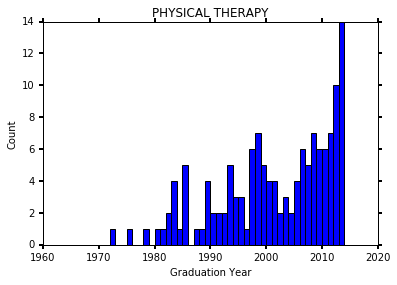

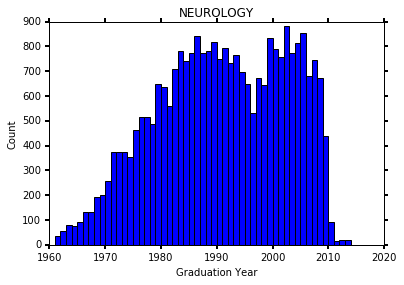

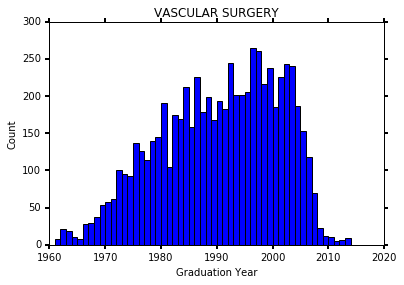

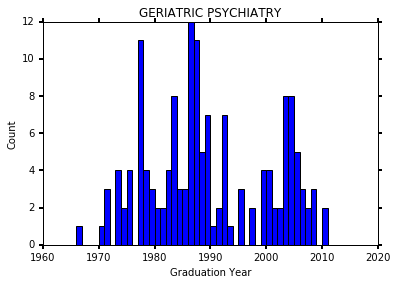

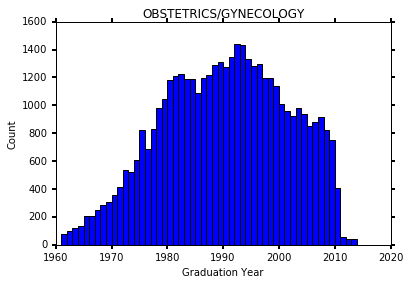

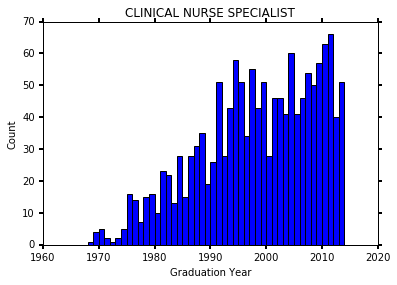

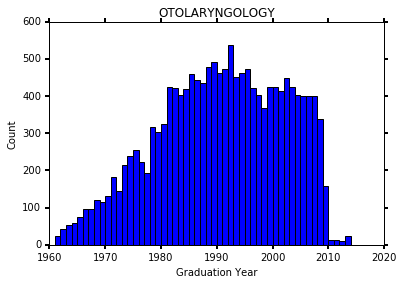

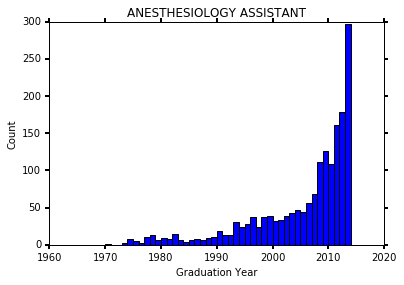

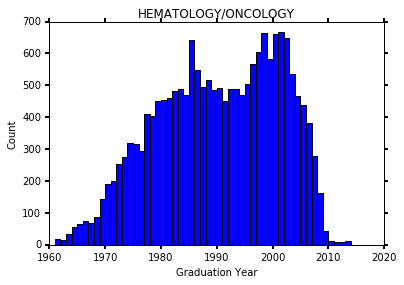

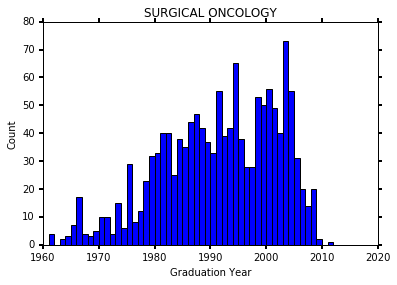

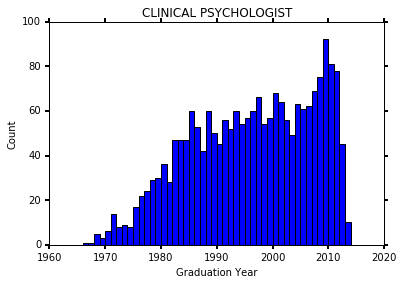

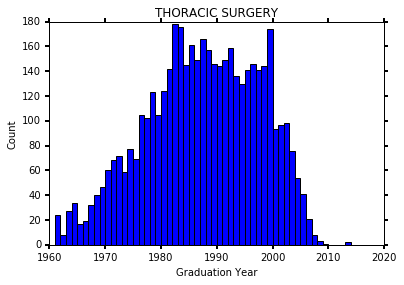

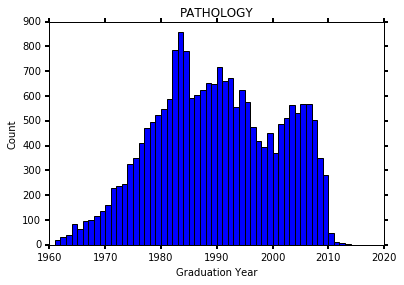

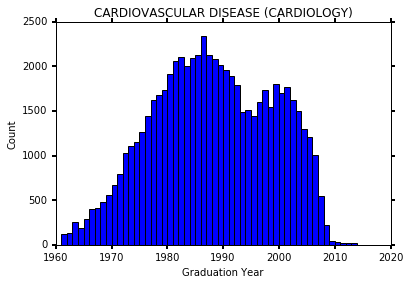

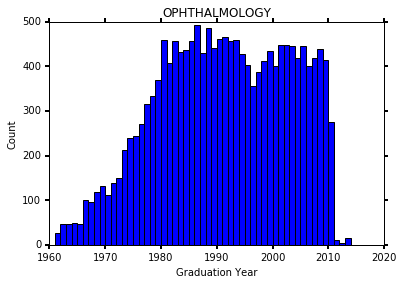

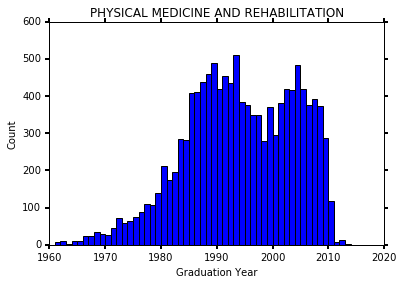

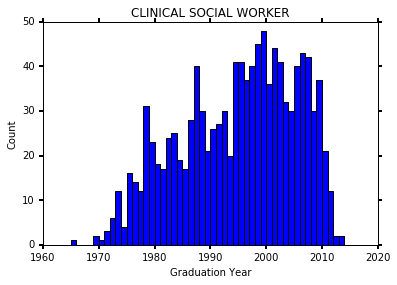

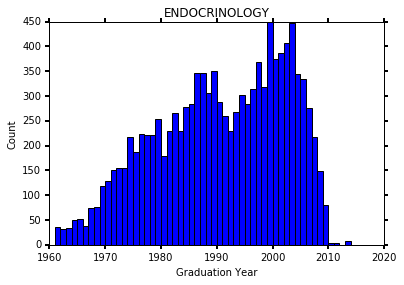

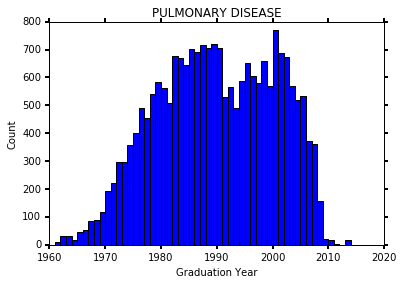

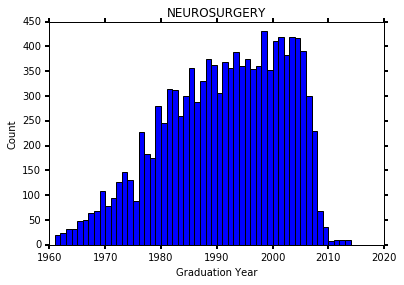

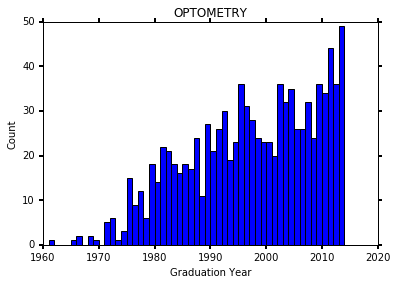

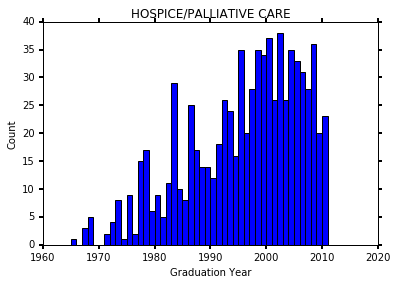

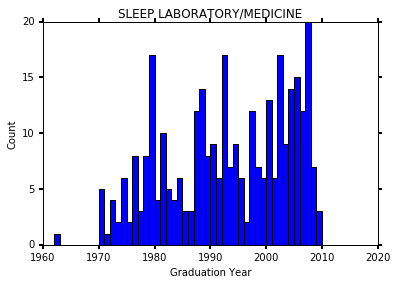

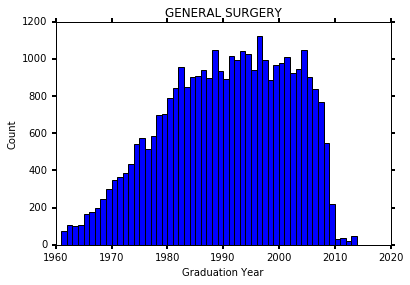

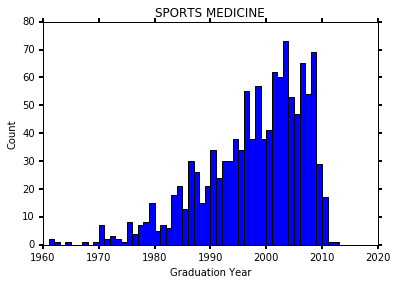

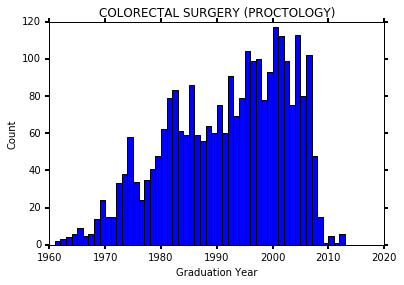

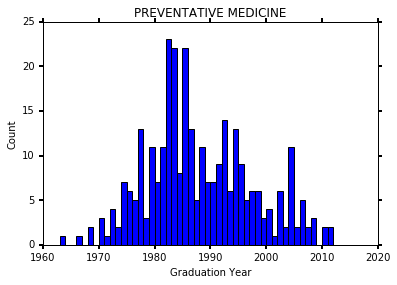

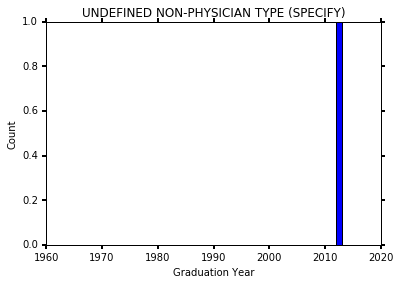

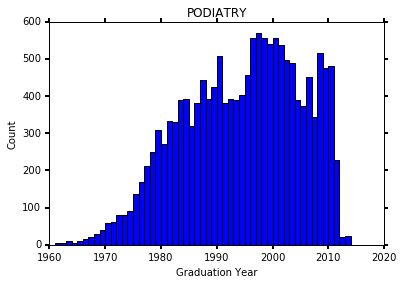

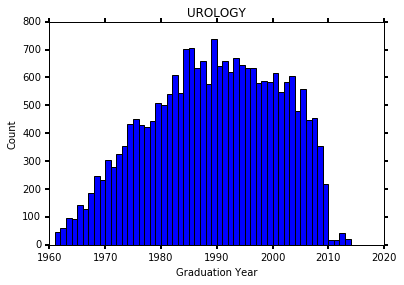

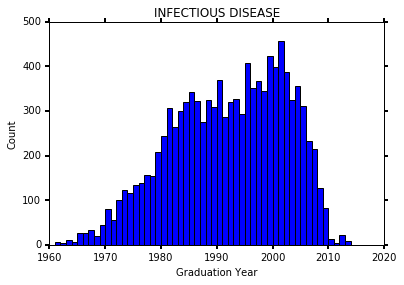

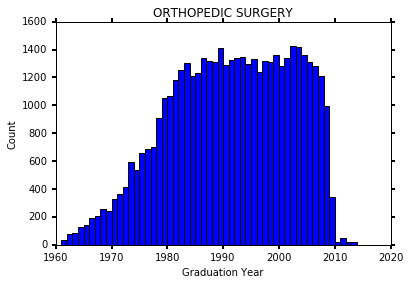

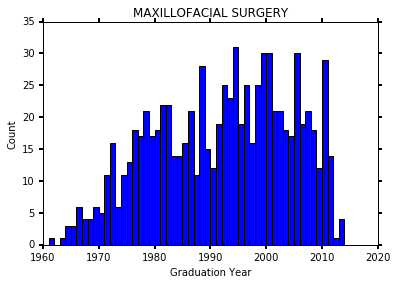

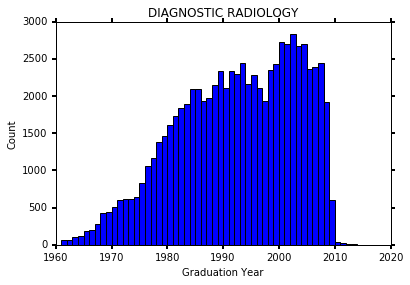

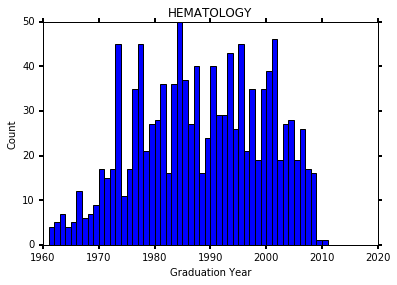

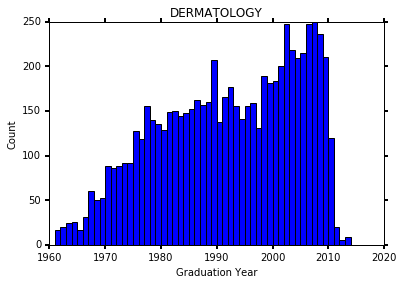

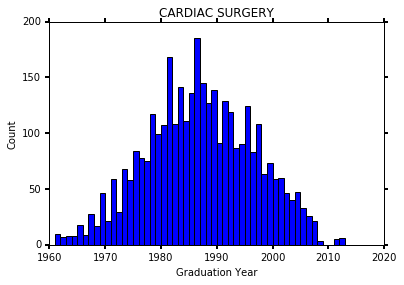

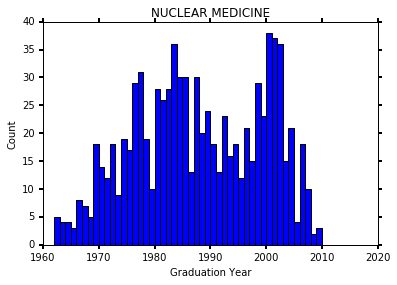

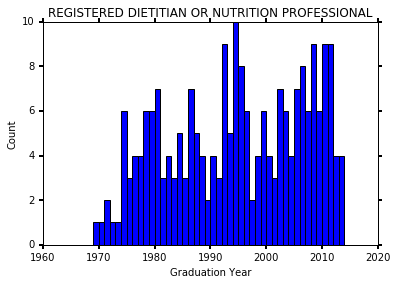

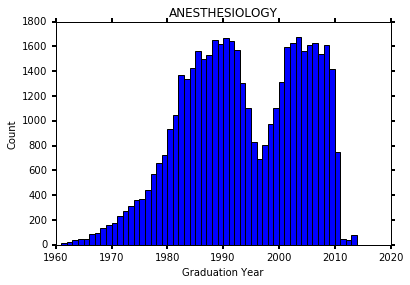

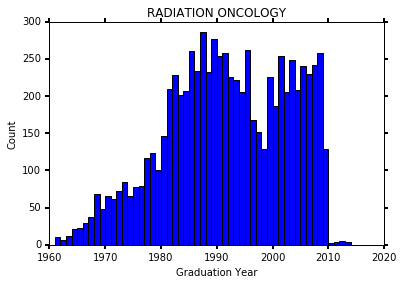

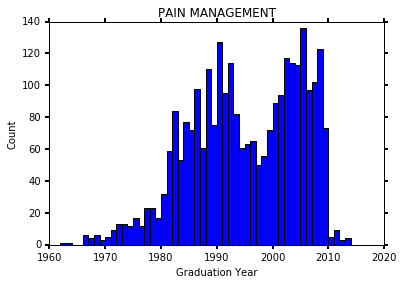

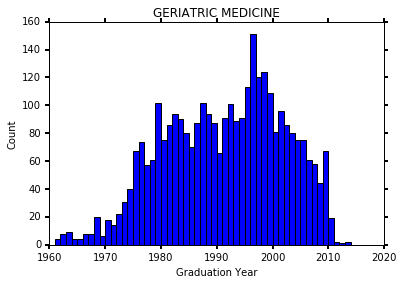

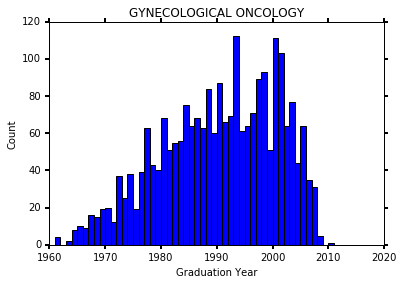

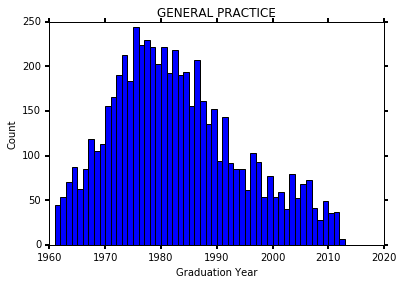

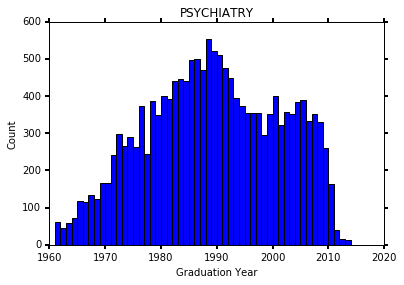

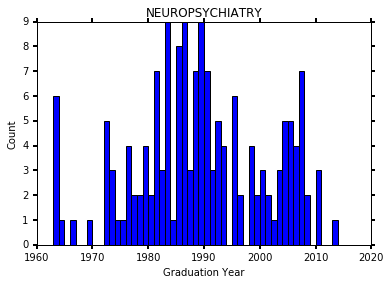

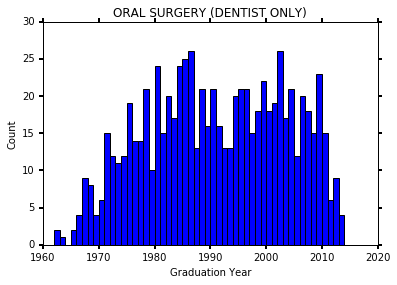

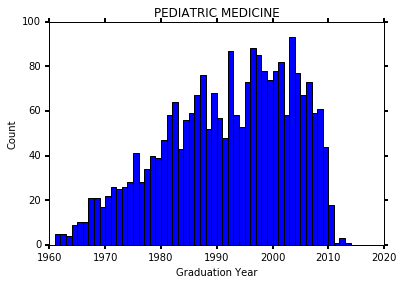

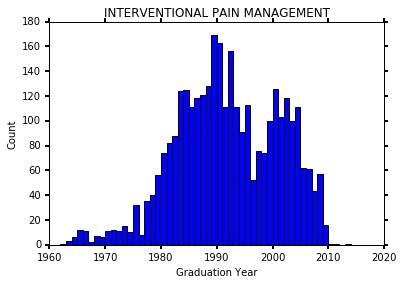

In [82]:
# Create histograms for the number of graduates in each year by specialty.
# Plot these, and also use them for K-Means clustering later.

# create bins for every 1 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_1_years = np.arange(1960, 2015, 1);
my_bins_1_years


for specialty, ind in data.groupby('Primary specialty').groups.items():
    #if specialty in []:
    # data.ix[ind, 'Graduation year'].hist()
    
    counts, bins = np.histogram(data.ix[ind, 'Graduation year'], my_bins_1_years)
    
    plt.clf()
    # plt.bar(bins[:-1], counts/sum(counts), width=1)
    plt.bar(bins[:-1], counts, width=1)
   
    # http://stackoverflow.com/questions/14705904/matplotlib-ticks-thickness
    # width=2 gives the right thickness    
    ax = plt.gca()
    ax.tick_params(width=2)

    # http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax
    ax.tick_params(axis='x', direction='out')
    
    plt.xlabel('Graduation Year')
    plt.ylabel('Count')
    plt.title(specialty)
    plt.show()
    

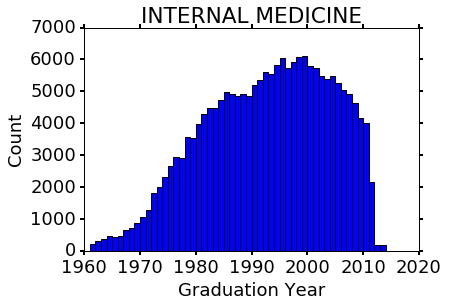

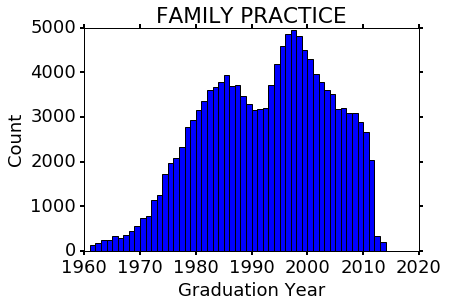

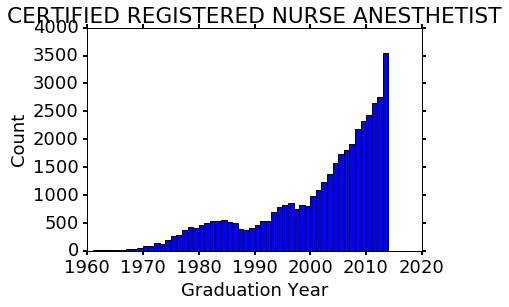

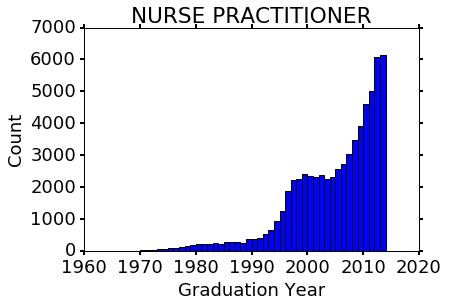

In [89]:
# Create histograms for the number of graduates in each year by specialty.
# Plot these, and also use them for K-Means clustering later.

# create bins for every 1 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_1_years = np.arange(1960, 2015, 1);
my_bins_1_years


# http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

# http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
rcParams.update({'font.size': 18})


for specialty, ind in data.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST']:
        # data.ix[ind, 'Graduation year'].hist()

        counts, bins = np.histogram(data.ix[ind, 'Graduation year'], my_bins_1_years)

        plt.clf()
        # plt.bar(bins[:-1], counts/sum(counts), width=1)
        plt.bar(bins[:-1], counts, width=1)

        # http://stackoverflow.com/questions/14705904/matplotlib-ticks-thickness
        # width=2 gives the right thickness    
        ax = plt.gca()
        ax.tick_params(width=2)

        # http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax
        ax.tick_params(axis='x', direction='out')

        plt.xlabel('Graduation Year')
        plt.ylabel('Count')
        plt.title(specialty)

        figname = specialty + '_graduation_hist.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        plt.savefig(figname, bbox_inches='tight')
        plt.show()
        
    

In [92]:
# Draw just the curves for each specialty overlaid on top of each other.


In [104]:
all_specialties = data['Primary specialty'].unique();
all_specialties

array(['ANESTHESIOLOGY', 'DIAGNOSTIC RADIOLOGY', 'FAMILY PRACTICE',
       'NURSE PRACTITIONER', 'INTERVENTIONAL RADIOLOGY', 'UROLOGY',
       'PULMONARY DISEASE', 'CERTIFIED REGISTERED NURSE ANESTHETIST',
       'NEPHROLOGY', 'NEUROLOGY', 'GASTROENTEROLOGY', 'INTERNAL MEDICINE',
       'INTERVENTIONAL PAIN MANAGEMENT', 'OBSTETRICS/GYNECOLOGY',
       'RHEUMATOLOGY', 'PODIATRY', 'GENERAL SURGERY', 'ORTHOPEDIC SURGERY',
       'ALLERGY/IMMUNOLOGY', 'OTOLARYNGOLOGY',
       'CARDIOVASCULAR DISEASE (CARDIOLOGY)', 'EMERGENCY MEDICINE',
       'MAXILLOFACIAL SURGERY', 'VASCULAR SURGERY', 'PATHOLOGY',
       'HEMATOLOGY/ONCOLOGY', 'DERMATOLOGY',
       'OSTEOPATHIC MANIPULATIVE MEDICINE', 'NEUROSURGERY',
       'RADIATION ONCOLOGY', 'GENERAL PRACTICE', 'PSYCHIATRY',
       'CARDIAC SURGERY', 'ORAL SURGERY (DENTIST ONLY)', 'OPHTHALMOLOGY',
       'ENDOCRINOLOGY', 'THORACIC SURGERY',
       'PLASTIC AND RECONSTRUCTIVE SURGERY',
       'PHYSICAL MEDICINE AND REHABILITATION', 'CLINICAL PSYCHOLOG

In [105]:
len(all_specialties)


76

In [117]:
num_specialties = len(all_specialties)

In [121]:
# Create a new dataframe: the columns are the specicalties.
# The rows contain the histogram bin counts for specified ranges of graduation years.
# E.g. row 1 could be the number that graduated in 1960, row 2 the number that graduated in 1961 etc.

# http://pandas.pydata.org/pandas-docs/version/0.15.2/10min.html

length_my_bins = len(my_bins)
all_specialties = data['Primary specialty'].unique()
num_specialties = len(all_specialties)

# For testing purposes: create a random 2-d array of the right size. We will turn it into a dataframe.
graduation_hist_df = pd.DataFrame(np.random.randn(length_my_bins,num_specialties),index=my_bins,columns=list(all_specialties))

In [122]:
graduation_hist_df.head(3)

,ANESTHESIOLOGY,DIAGNOSTIC RADIOLOGY,FAMILY PRACTICE,NURSE PRACTITIONER,INTERVENTIONAL RADIOLOGY,UROLOGY,PULMONARY DISEASE,CERTIFIED REGISTERED NURSE ANESTHETIST,NEPHROLOGY,NEUROLOGY,...,CERTIFIED NURSE MIDWIFE,AUDIOLOGIST,CLINICAL NURSE SPECIALIST,SPEECH LANGUAGE PATHOLOGIST,ADDICTION MEDICINE,NEUROPSYCHIATRY,GERIATRIC PSYCHIATRY,OCCUPATIONAL THERAPY,SINGLE OR MULTISPECIALTY CLINIC OR GROUP PRACTICE,UNDEFINED NON-PHYSICIAN TYPE (SPECIFY)
1960,-0.985396,0.007600,-0.683396,0.859851,-0.089413,-0.428779,0.238671,0.086994,-1.386434,0.939972,...,-1.709977,0.682867,-2.112024,0.566444,0.463266,-0.230724,-0.007665,-0.625480,0.883671,0.861792
1965,0.324612,0.617483,1.088353,-0.951020,-1.217803,-0.035833,0.509498,0.328099,1.166951,0.593410,...,-0.951040,0.882337,-1.918180,-0.404005,-0.527231,0.972068,0.284642,0.913639,-2.365465,-0.364374
1970,-0.628192,0.493607,0.546408,0.014129,-0.143810,-0.052230,0.452216,1.077189,-0.110675,-0.501382,...,-0.454061,-1.567003,-0.371248,0.994480,1.625463,-1.033311,-0.813694,0.425268,1.316702,1.527683


In [124]:
graduation_hist_df.tail(3)

,ANESTHESIOLOGY,DIAGNOSTIC RADIOLOGY,FAMILY PRACTICE,NURSE PRACTITIONER,INTERVENTIONAL RADIOLOGY,UROLOGY,PULMONARY DISEASE,CERTIFIED REGISTERED NURSE ANESTHETIST,NEPHROLOGY,NEUROLOGY,...,CERTIFIED NURSE MIDWIFE,AUDIOLOGIST,CLINICAL NURSE SPECIALIST,SPEECH LANGUAGE PATHOLOGIST,ADDICTION MEDICINE,NEUROPSYCHIATRY,GERIATRIC PSYCHIATRY,OCCUPATIONAL THERAPY,SINGLE OR MULTISPECIALTY CLINIC OR GROUP PRACTICE,UNDEFINED NON-PHYSICIAN TYPE (SPECIFY)
2000,-0.100814,-0.666129,-0.628124,0.331285,-1.838561,-0.217853,-0.678994,0.175204,-1.036832,0.803756,...,-1.076355,0.433174,1.382858,0.214402,0.347345,0.044246,0.277728,0.911717,-0.753058,0.668855
2005,0.066997,0.394378,-0.052884,0.132038,-0.174254,-0.593113,-1.813569,-0.410473,-0.928831,-1.430803,...,0.464283,0.917704,0.465223,0.036017,-0.113861,0.184268,1.437125,-0.513733,0.828035,-0.357705
2010,-0.837461,-0.638879,-0.624113,-1.942810,-0.772931,0.867340,2.426458,1.031544,0.247928,0.702229,...,-1.176504,-1.603424,-0.283450,1.668375,0.207855,-1.302469,-0.948007,-0.000628,0.577842,1.161892


In [136]:
# Assign a vector to the first coluumn and see if it shows up there.
this_vec = np.arange(length_my_bins);
this_vec



array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [138]:
graduation_hist_df['ANESTHESIOLOGY'] = this_vec

In [139]:

graduation_hist_df.tail(3)

,ANESTHESIOLOGY,DIAGNOSTIC RADIOLOGY,FAMILY PRACTICE,NURSE PRACTITIONER,INTERVENTIONAL RADIOLOGY,UROLOGY,PULMONARY DISEASE,CERTIFIED REGISTERED NURSE ANESTHETIST,NEPHROLOGY,NEUROLOGY,...,CERTIFIED NURSE MIDWIFE,AUDIOLOGIST,CLINICAL NURSE SPECIALIST,SPEECH LANGUAGE PATHOLOGIST,ADDICTION MEDICINE,NEUROPSYCHIATRY,GERIATRIC PSYCHIATRY,OCCUPATIONAL THERAPY,SINGLE OR MULTISPECIALTY CLINIC OR GROUP PRACTICE,UNDEFINED NON-PHYSICIAN TYPE (SPECIFY)
2000,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
a = np.zeros(3)
a

array([ 0.,  0.,  0.])

In [133]:
a = np.zeros(shape= (3, 3))
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [135]:
###################################################################################################

In [144]:
# create bins for every 1 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_1_years = np.arange(1960, 2015, 1);
my_bins_1_years

target_specialties = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# If you want to use all specialties, uncomment the following line
# target_specialties = all_specialties

num_specialties = len(target_specialties)

# 2-d array of the right size filled with zeros. We will turn it into a dataframe.
graduation_hist_df = pd.DataFrame(np.zeros(shape= (len(my_bins_1_years),num_specialties)),index=my_bins_1_years,
                                  columns=list(target_specialties));
graduation_hist_df

,INTERNAL MEDICINE,FAMILY PRACTICE,NURSE PRACTITIONER,CERTIFIED REGISTERED NURSE ANESTHETIST
1960,0.0,0.0,0.0,0.0
1961,0.0,0.0,0.0,0.0
1962,0.0,0.0,0.0,0.0
1963,0.0,0.0,0.0,0.0
1964,0.0,0.0,0.0,0.0
1965,0.0,0.0,0.0,0.0
1966,0.0,0.0,0.0,0.0
1967,0.0,0.0,0.0,0.0
1968,0.0,0.0,0.0,0.0
1969,0.0,0.0,0.0,0.0


In [155]:
for specialty, ind in data.groupby('Primary specialty').groups.items():
    if specialty in target_specialties:
        # data.ix[ind, 'Graduation year'].hist()

        counts, bins = np.histogram(data.ix[ind, 'Graduation year'], my_bins_1_years);
        print(counts)
        print(len(counts))
        for i, j in enumerate(list(counts)):
            print(i, j)

[   0  222  313  373  450  423  470  668  727  865 1075 1273 1800 1995 2306
 2667 2935 2924 3572 3535 3967 4279 4478 4473 4739 4987 4912 4844 4907 4863
 5196 5343 5620 5530 5835 6041 5744 5927 6076 6100 5789 5746 5483 5376 5487
 5270 5055 4910 4629 4160 4021 2172  184  178]
54
0 0
1 222
2 313
3 373
4 450
5 423
6 470
7 668
8 727
9 865
10 1075
11 1273
12 1800
13 1995
14 2306
15 2667
16 2935
17 2924
18 3572
19 3535
20 3967
21 4279
22 4478
23 4473
24 4739
25 4987
26 4912
27 4844
28 4907
29 4863
30 5196
31 5343
32 5620
33 5530
34 5835
35 6041
36 5744
37 5927
38 6076
39 6100
40 5789
41 5746
42 5483
43 5376
44 5487
45 5270
46 5055
47 4910
48 4629
49 4160
50 4021
51 2172
52 184
53 178
[   0  137  179  240  252  337  277  360  436  549  732  771 1129 1240 1721
 1959 2072 2323 2781 2932 3145 3366 3610 3669 3783 3935 3696 3709 3477 3292
 3158 3176 3189 3719 4177 4577 4858 4948 4815 4488 4286 3964 3771 3602 3516
 3176 3198 3082 3089 2883 2653 2033  334  187]
54
0 0
1 137
2 179
3 240
4 252
5 337
6 

In [158]:
graduation_hist_df.shape

(55, 4)

In [ ]:
# This shows I need to reduce the size of my dataframe.
# It should have 54 rows as there are 54 values for "counts"
# Actually this is wrong, as the next couple of cells show.

In [160]:
my_bins_1_years

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [161]:
len(my_bins_1_years)

55

In [163]:
counts

array([   0,    1,    4,    2,    3,    3,    6,    4,    5,    8,   20,
         17,   17,   43,   53,   74,   85,  125,  162,  170,  216,  215,
        225,  246,  222,  275,  289,  276,  242,  355,  381,  404,  537,
        641,  926, 1263, 1865, 2223, 2259, 2395, 2356, 2323, 2364, 2247,
       2322, 2581, 2725, 3043, 3474, 3927, 4604, 5024, 6074, 6127])

In [162]:
len(counts)

54

In [ ]:
# I should actually increase the length of the count vector, and add a zero towards the end.
# That means there will be a zero count for the last year.
# I suppose this relates to the interpretation of the histogram bins.
# Bin 1 is the count between 1960 and 1961, etc.

In [167]:
np.append(counts, 0)

array([   0,    1,    4,    2,    3,    3,    6,    4,    5,    8,   20,
         17,   17,   43,   53,   74,   85,  125,  162,  170,  216,  215,
        225,  246,  222,  275,  289,  276,  242,  355,  381,  404,  537,
        641,  926, 1263, 1865, 2223, 2259, 2395, 2356, 2323, 2364, 2247,
       2322, 2581, 2725, 3043, 3474, 3927, 4604, 5024, 6074, 6127,    0])

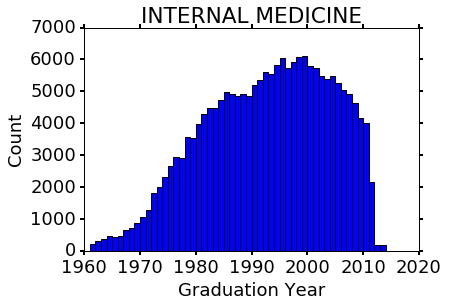

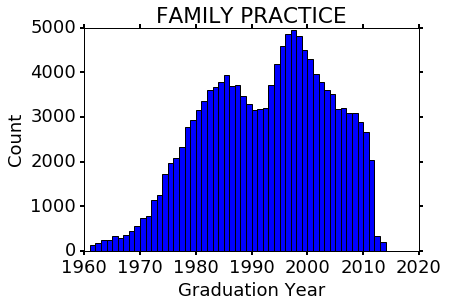

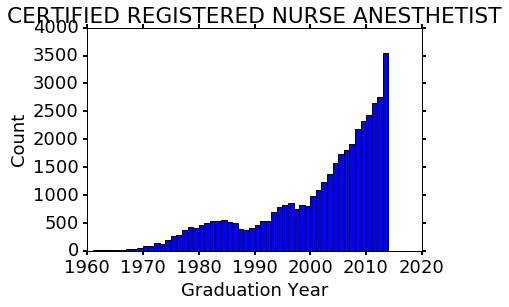

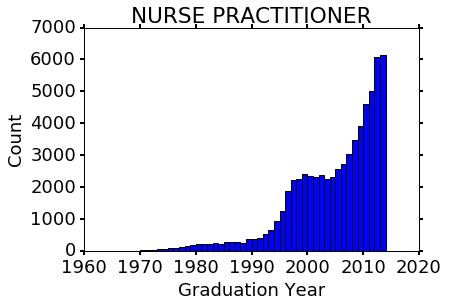

In [168]:
# Create histograms for the number of graduates in each year by specialty.
# Plot these, and also use them for K-Means clustering later.

# create bins for every 1 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_1_years = np.arange(1960, 2015, 1);
my_bins_1_years

target_specialties = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# If you want to use all specialties, uncomment the following line
# target_specialties = all_specialties

num_specialties = len(target_specialties)

# 2-d array of the right size filled with zeros. We will turn it into a dataframe.
graduation_hist_df = pd.DataFrame(np.zeros(shape= (len(my_bins_1_years),num_specialties)),index=my_bins_1_years,
                                  columns=list(target_specialties));

for specialty, ind in data.groupby('Primary specialty').groups.items():
    if specialty in target_specialties:
        # data.ix[ind, 'Graduation year'].hist()

        counts, bins = np.histogram(data.ix[ind, 'Graduation year'], my_bins_1_years);
               
        # save this in the large feature matrix (dataframe)
        # graduation_hist_df[specialty] = counts
        # Make sure you add a zero at the end of "counts" to match all the dimensions.
        graduation_hist_df[specialty] = np.append(counts, 0)

        plt.clf()
        # plt.bar(bins[:-1], counts/sum(counts), width=1)
        plt.bar(bins[:-1], counts, width=1)

        # http://stackoverflow.com/questions/14705904/matplotlib-ticks-thickness
        # width=2 gives the right thickness    
        ax = plt.gca()
        ax.tick_params(width=2)

        # http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax
        ax.tick_params(axis='x', direction='out')

        plt.xlabel('Graduation Year')
        plt.ylabel('Count')
        plt.title(specialty)

        figname = specialty + '_graduation_hist.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        plt.savefig(figname, bbox_inches='tight')
        plt.show()

In [169]:
 # This is to check that the feature matrix is correct.
graduation_hist_df

,INTERNAL MEDICINE,FAMILY PRACTICE,NURSE PRACTITIONER,CERTIFIED REGISTERED NURSE ANESTHETIST
1960,0,0,0,0
1961,222,137,1,6
1962,313,179,4,7
1963,373,240,2,10
1964,450,252,3,14
1965,423,337,3,15
1966,470,277,6,15
1967,668,360,4,32
1968,727,436,5,33
1969,865,549,8,45


In [170]:
#Note: in the following, use all_specialties and do not plot.

# Create histograms for the number of graduates in each year by specialty.
# Plot these, and also use them for K-Means clustering later.

# create bins for every 1 years, starting at 1960 going up to 2015
# This will standardize my feature vector dimensions
my_bins_1_years = np.arange(1960, 2015, 1);
my_bins_1_years

# target_specialties = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# If you want to use all specialties, uncomment the following line
target_specialties = all_specialties

plot_flag = 0

num_specialties = len(target_specialties)

# 2-d array of the right size filled with zeros. We will turn it into a dataframe.
graduation_hist_df = pd.DataFrame(np.zeros(shape= (len(my_bins_1_years),num_specialties)),index=my_bins_1_years,
                                  columns=list(target_specialties));

for specialty, ind in data.groupby('Primary specialty').groups.items():
    if specialty in target_specialties:
        # data.ix[ind, 'Graduation year'].hist()

        counts, bins = np.histogram(data.ix[ind, 'Graduation year'], my_bins_1_years);
               
        # save this in the large feature matrix (dataframe)
        # graduation_hist_df[specialty] = counts
        # Make sure you add a zero at the end of "counts" to match all the dimensions.
        graduation_hist_df[specialty] = np.append(counts, 0)

        if plot_flag:
            plt.clf()
            # plt.bar(bins[:-1], counts/sum(counts), width=1)
            plt.bar(bins[:-1], counts, width=1)

            # http://stackoverflow.com/questions/14705904/matplotlib-ticks-thickness
            # width=2 gives the right thickness    
            ax = plt.gca()
            ax.tick_params(width=2)

            # http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax
            ax.tick_params(axis='x', direction='out')

            plt.xlabel('Graduation Year')
            plt.ylabel('Count')
            plt.title(specialty)

            figname = specialty + '_graduation_hist.png'
            # replace whitespace in the figname with underscore
            figname = figname.replace(' ', '_')  

            plt.savefig(figname, bbox_inches='tight')
            plt.show()

In [171]:
 # This is to check that the feature matrix is correct.
graduation_hist_df.head(3)

,ANESTHESIOLOGY,DIAGNOSTIC RADIOLOGY,FAMILY PRACTICE,NURSE PRACTITIONER,INTERVENTIONAL RADIOLOGY,UROLOGY,PULMONARY DISEASE,CERTIFIED REGISTERED NURSE ANESTHETIST,NEPHROLOGY,NEUROLOGY,...,CERTIFIED NURSE MIDWIFE,AUDIOLOGIST,CLINICAL NURSE SPECIALIST,SPEECH LANGUAGE PATHOLOGIST,ADDICTION MEDICINE,NEUROPSYCHIATRY,GERIATRIC PSYCHIATRY,OCCUPATIONAL THERAPY,SINGLE OR MULTISPECIALTY CLINIC OR GROUP PRACTICE,UNDEFINED NON-PHYSICIAN TYPE (SPECIFY)
1960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1961,17,64,137,1,1,47,11,6,32,35,...,0,0,0,0,0,0,0,0,0,0
1962,20,67,179,4,0,62,31,7,47,55,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# Drop the last two specialties -- "SINGLE OR MULTISPECIALTY" and "UNDEFINED NON..."
num_specialties


76

In [179]:
graduation_hist_df.drop(graduation_hist_df.columns[[num_specialties - 1, num_specialties - 2]], axis=1, inplace=True) 

In [180]:
graduation_hist_df

,ANESTHESIOLOGY,DIAGNOSTIC RADIOLOGY,FAMILY PRACTICE,NURSE PRACTITIONER,INTERVENTIONAL RADIOLOGY,UROLOGY,PULMONARY DISEASE,CERTIFIED REGISTERED NURSE ANESTHETIST,NEPHROLOGY,NEUROLOGY,...,HOSPICE/PALLIATIVE CARE,PERIPHERAL VASCULAR DISEASE,CERTIFIED NURSE MIDWIFE,AUDIOLOGIST,CLINICAL NURSE SPECIALIST,SPEECH LANGUAGE PATHOLOGIST,ADDICTION MEDICINE,NEUROPSYCHIATRY,GERIATRIC PSYCHIATRY,OCCUPATIONAL THERAPY
1960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1961,17,64,137,1,1,47,11,6,32,35,...,0,0,0,0,0,0,0,0,0,0
1962,20,67,179,4,0,62,31,7,47,55,...,0,0,0,0,0,0,0,0,0,0
1963,37,99,240,2,3,96,30,10,41,80,...,0,1,1,0,0,0,0,6,0,0
1964,48,124,252,3,0,94,18,14,49,77,...,0,0,1,0,0,0,0,1,0,0
1965,50,191,337,3,1,141,46,15,47,93,...,1,0,0,0,0,0,2,0,0,0
1966,89,194,277,6,14,129,52,15,74,132,...,0,0,0,0,0,0,1,1,1,0
1967,99,282,360,4,4,185,84,32,78,133,...,3,0,0,0,0,0,0,0,0,0
1968,134,425,436,5,9,245,90,33,133,194,...,5,0,1,0,1,0,0,0,0,0
1969,163,442,549,8,5,232,118,45,136,202,...,0,0,1,0,4,0,0,1,0,0


In [181]:
# now perform k-means clustering on this.

In [182]:
# convert elements of dataframe into 2d numpy array.

# http://pandas.pydata.org/pandas-docs/stable/cookbook.html
df = pd.DataFrame({'AAA' : [4,5,6,7], 'BBB' : [10,20,30,40],'CCC' : [100,50,-30,-50]});
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30
3,7,40,-50


In [185]:
a= df.ix[{0, 1, 2}, 'BBB']

In [186]:
type(a)

pandas.core.series.Series

In [187]:
a= df.ix[{0, 1, 2}, ['AAAA','BBB']]
type(a)

pandas.core.frame.DataFrame

In [188]:
a= df.ix[{0, 1, 2}]
type(a)

pandas.core.frame.DataFrame

In [189]:
a

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,-30


In [190]:
b = np.array(a)

In [191]:
type(b)

numpy.ndarray

In [192]:
b.shape

(3, 3)

In [193]:
b

array([[  4,  10, 100],
       [  5,  20,  50],
       [  6,  30, -30]])

In [194]:
# OK, so the above is the way to go.


In [198]:
a = graduation_hist_df.ix[my_bins_1_years]


In [199]:
# Take the transpose as we want each row to represent a feature vector.
a = a.transpose

In [200]:
all_feature_vectors = np.array(a)

In [201]:
all_feature_vectors

array(<bound method DataFrame.transpose of       ANESTHESIOLOGY  DIAGNOSTIC RADIOLOGY  FAMILY PRACTICE  \
1960               0                     0                0   
1961              17                    64              137   
1962              20                    67              179   
1963              37                    99              240   
1964              48                   124              252   
1965              50                   191              337   
1966              89                   194              277   
1967              99                   282              360   
1968             134                   425              436   
1969             163                   442              549   
1970             175                   511              732   
1971             236                   600              771   
1972             276                   619             1129   
1973             310                   612             1240   
1974        

In [202]:
# Note: the above retains the header and the graduation years. That is not what we want.
# http://stackoverflow.com/questions/13187778/convert-pandas-dataframe-to-numpy-array-preserving-index
all_feature_vectors = graduation_hist_df.values

In [203]:
all_feature_vectors

array([[  0,   0,   0, ...,   0,   0,   0],
       [ 17,  64, 137, ...,   0,   0,   0],
       [ 20,  67, 179, ...,   0,   0,   0],
       ..., 
       [ 38,   8, 334, ...,   0,   0,   0],
       [ 80,   8, 187, ...,   1,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0]])

In [204]:
# The above is correct. Take the transpose
all_feature_vectors = all_feature_vectors.transpose()

In [205]:
all_feature_vectors.shape

(74, 55)

In [206]:
# Now run Kmeans on this.
# see README.ppt in C:\Users\ravirao\Documents\misc\info\Software_packages\Scikit
from sklearn.cluster import KMeans

In [207]:
KMeans?

In [208]:
nsamples, n_features = all_feature_vectors.shape
print(nsamples, n_features)

74 55


In [209]:
print(all_feature_vectors[0])

[   0   17   20   37   48   50   89   99  134  163  175  236  276  310  363
  368  439  572  658  724  936 1043 1370 1337 1423 1566 1496 1531 1654 1616
 1665 1644 1572 1308 1103  829  691  807  974 1103 1311 1597 1627 1679 1563
 1615 1631 1541 1612 1421  747   46   38   80    0]


In [210]:
k_means = KMeans(n_clusters=5, random_state=0) #Fixing the RNG in KMeans

In [211]:
k_means.fit(all_feature_vectors)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=0, tol=0.0001,
    verbose=0)

In [212]:
result = k_means.fit(all_feature_vectors)

In [213]:
print(result.cluster_centers_)

[[  0.00000000e+00   3.79166667e+00   4.58333333e+00   5.68750000e+00
    6.77083333e+00   7.35416667e+00   9.60416667e+00   1.17083333e+01
    1.36041667e+01   1.46250000e+01   2.02500000e+01   2.22083333e+01
    2.69375000e+01   3.12083333e+01   3.23125000e+01   3.87916667e+01
    4.07083333e+01   4.29375000e+01   4.50833333e+01   4.70625000e+01
    5.05208333e+01   5.78958333e+01   6.18750000e+01   6.05208333e+01
    6.32708333e+01   6.70416667e+01   6.97083333e+01   6.86041667e+01
    6.44166667e+01   6.68750000e+01   6.25416667e+01   6.13958333e+01
    6.47291667e+01   6.06458333e+01   6.03541667e+01   6.56666667e+01
    6.48333333e+01   6.64791667e+01   7.04375000e+01   7.34166667e+01
    7.52083333e+01   7.82500000e+01   7.30833333e+01   7.32291667e+01
    6.94166667e+01   6.32916667e+01   5.54791667e+01   4.85416667e+01
    4.18333333e+01   2.84375000e+01   1.85000000e+01   1.37291667e+01
    1.03958333e+01   1.24166667e+01   0.00000000e+00]
 [  0.00000000e+00   1.79500000e+02 

In [214]:
print(result.labels_)

[2 2 1 4 0 3 3 4 3 3 3 1 0 2 0 3 3 2 0 3 2 3 0 0 3 3 0 0 3 0 0 3 0 0 3 3 0
 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [215]:
# Maybe use 7 clusters instead
k_means = KMeans(n_clusters=7, random_state=0) #Fixing the RNG in KMeans
result = k_means.fit(all_feature_vectors)
print(result.labels_)

[2 2 4 3 0 5 5 6 5 5 5 1 0 2 0 5 5 2 0 5 2 5 0 0 5 5 0 0 5 0 0 5 0 0 5 5 0
 0 5 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


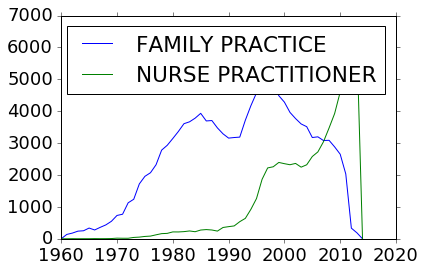

In [220]:
# Now plot all those curves 
# First, check if 2-4 histograms can be shown together.
plt.clf()
plt.plot(graduation_hist_df['FAMILY PRACTICE'])
plt.plot(graduation_hist_df['NURSE PRACTITIONER'])
plt.legend()
plt.show()


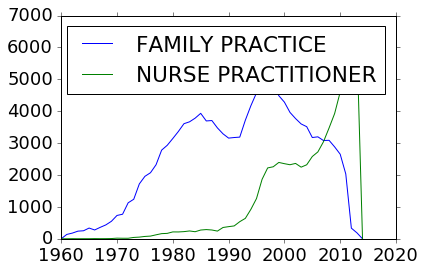

/home/ravirao/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [222]:
# http://matplotlib.org/users/legend_guide.html
# Place a legend to the right

# Now plot all those curves 
# First, check if 2-4 histograms can be shown together.
plt.clf()
plt.plot(graduation_hist_df['FAMILY PRACTICE'])
plt.plot(graduation_hist_df['NURSE PRACTITIONER'])
plt.legend()
plt.show()

# Place a legend to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

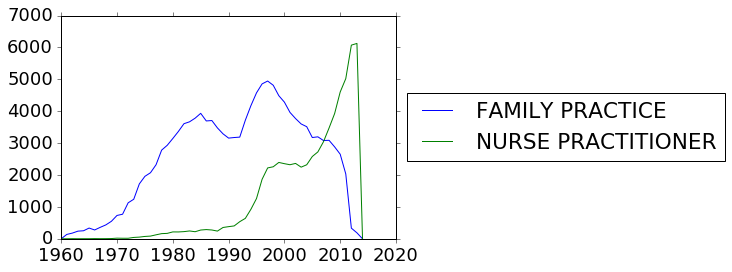

In [224]:
# http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# http://matplotlib.org/users/legend_guide.html
# Place a legend to the right

# Now plot all those curves 
# First, check if 2-4 histograms can be shown together.
plt.clf()
plt.plot(graduation_hist_df['FAMILY PRACTICE'])
plt.plot(graduation_hist_df['NURSE PRACTITIONER'])
# Place a legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()



In [226]:
# Finally, we should drop that last point, at 2014 which is 0
graduation_hist_df['FAMILY PRACTICE']

1960       0
1961     137
1962     179
1963     240
1964     252
1965     337
1966     277
1967     360
1968     436
1969     549
1970     732
1971     771
1972    1129
1973    1240
1974    1721
1975    1959
1976    2072
1977    2323
1978    2781
1979    2932
1980    3145
1981    3366
1982    3610
1983    3669
1984    3783
1985    3935
1986    3696
1987    3709
1988    3477
1989    3292
1990    3158
1991    3176
1992    3189
1993    3719
1994    4177
1995    4577
1996    4858
1997    4948
1998    4815
1999    4488
2000    4286
2001    3964
2002    3771
2003    3602
2004    3516
2005    3176
2006    3198
2007    3082
2008    3089
2009    2883
2010    2653
2011    2033
2012     334
2013     187
2014       0
Name: FAMILY PRACTICE, dtype: int64

In [236]:
a = graduation_hist_df.ix[my_bins_1_years, 'FAMILY PRACTICE']

In [237]:
a

1960       0
1961     137
1962     179
1963     240
1964     252
1965     337
1966     277
1967     360
1968     436
1969     549
1970     732
1971     771
1972    1129
1973    1240
1974    1721
1975    1959
1976    2072
1977    2323
1978    2781
1979    2932
1980    3145
1981    3366
1982    3610
1983    3669
1984    3783
1985    3935
1986    3696
1987    3709
1988    3477
1989    3292
1990    3158
1991    3176
1992    3189
1993    3719
1994    4177
1995    4577
1996    4858
1997    4948
1998    4815
1999    4488
2000    4286
2001    3964
2002    3771
2003    3602
2004    3516
2005    3176
2006    3198
2007    3082
2008    3089
2009    2883
2010    2653
2011    2033
2012     334
2013     187
2014       0
Name: FAMILY PRACTICE, dtype: int64

In [232]:
print(a)

Series([], Name: FAMILY PRACTICE, dtype: int64)


In [238]:
my_bins_1_years[0:4]

array([1960, 1961, 1962, 1963])

In [239]:
my_bins_1_years[0:len(my_bins_1_years) - 1]

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013])

In [ ]:
# OK, we use the above to drop the last row in the dataframe graduation_hist_df.ix


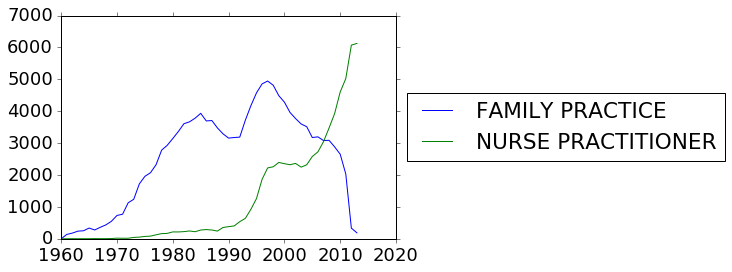

In [241]:
# http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# http://matplotlib.org/users/legend_guide.html
# Place a legend to the right

# Now plot all those curves 
# First, check if 2-4 histograms can be shown together.
plt.clf()
plt.plot(graduation_hist_df.ix[my_bins_1_years[0:len(my_bins_1_years)-1], 'FAMILY PRACTICE'])
plt.plot(graduation_hist_df.ix[my_bins_1_years[0:len(my_bins_1_years)-1], 'NURSE PRACTITIONER'])
# Place a legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [245]:
# Note: you should not use an index like 0:1 in the following
graduation_hist_df.ix[0:2, 0]

Series([], Name: ANESTHESIOLOGY, dtype: int64)

In [244]:
# Rather, use the following indexing:
graduation_hist_df.ix[my_bins_1_years[0:2], 0]

1960     0
1961    17
Name: ANESTHESIOLOGY, dtype: int64

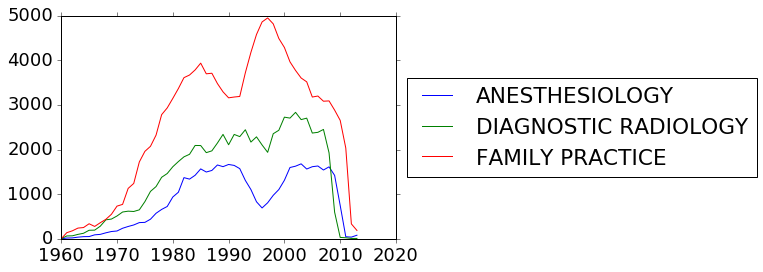

In [248]:
# http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# http://matplotlib.org/users/legend_guide.html
# Place a legend to the right

# Now plot all those curves 
plt.clf()

for i in [0, 1, 2]:
    plt.plot(graduation_hist_df.ix[my_bins_1_years[0:len(my_bins_1_years)-1], i])
    # Place a legend to the right

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [250]:
# The above plot shows that perhaps I should normalize all the feature values. Come to that later.

Plotted i = 0
Plotted i = 1
Plotted i = 2
Plotted i = 3
Plotted i = 4
Plotted i = 5
Plotted i = 6
Plotted i = 7
Plotted i = 8
Plotted i = 9
Plotted i = 10
Plotted i = 11
Plotted i = 12
Plotted i = 13
Plotted i = 14
Plotted i = 15
Plotted i = 16
Plotted i = 17
Plotted i = 18
Plotted i = 19
Plotted i = 20
Plotted i = 21
Plotted i = 22
Plotted i = 23
Plotted i = 24
Plotted i = 25
Plotted i = 26
Plotted i = 27
Plotted i = 28
Plotted i = 29
Plotted i = 30
Plotted i = 31
Plotted i = 32
Plotted i = 33
Plotted i = 34
Plotted i = 35
Plotted i = 36
Plotted i = 37
Plotted i = 38
Plotted i = 39
Plotted i = 40
Plotted i = 41
Plotted i = 42
Plotted i = 43
Plotted i = 44
Plotted i = 45
Plotted i = 46
Plotted i = 47
Plotted i = 48
Plotted i = 49
Plotted i = 50
Plotted i = 51
Plotted i = 52
Plotted i = 53
Plotted i = 54
Plotted i = 55
Plotted i = 56
Plotted i = 57
Plotted i = 58
Plotted i = 59
Plotted i = 60
Plotted i = 61
Plotted i = 62
Plotted i = 63
Plotted i = 64
Plotted i = 65
Plotted i = 66
Plott

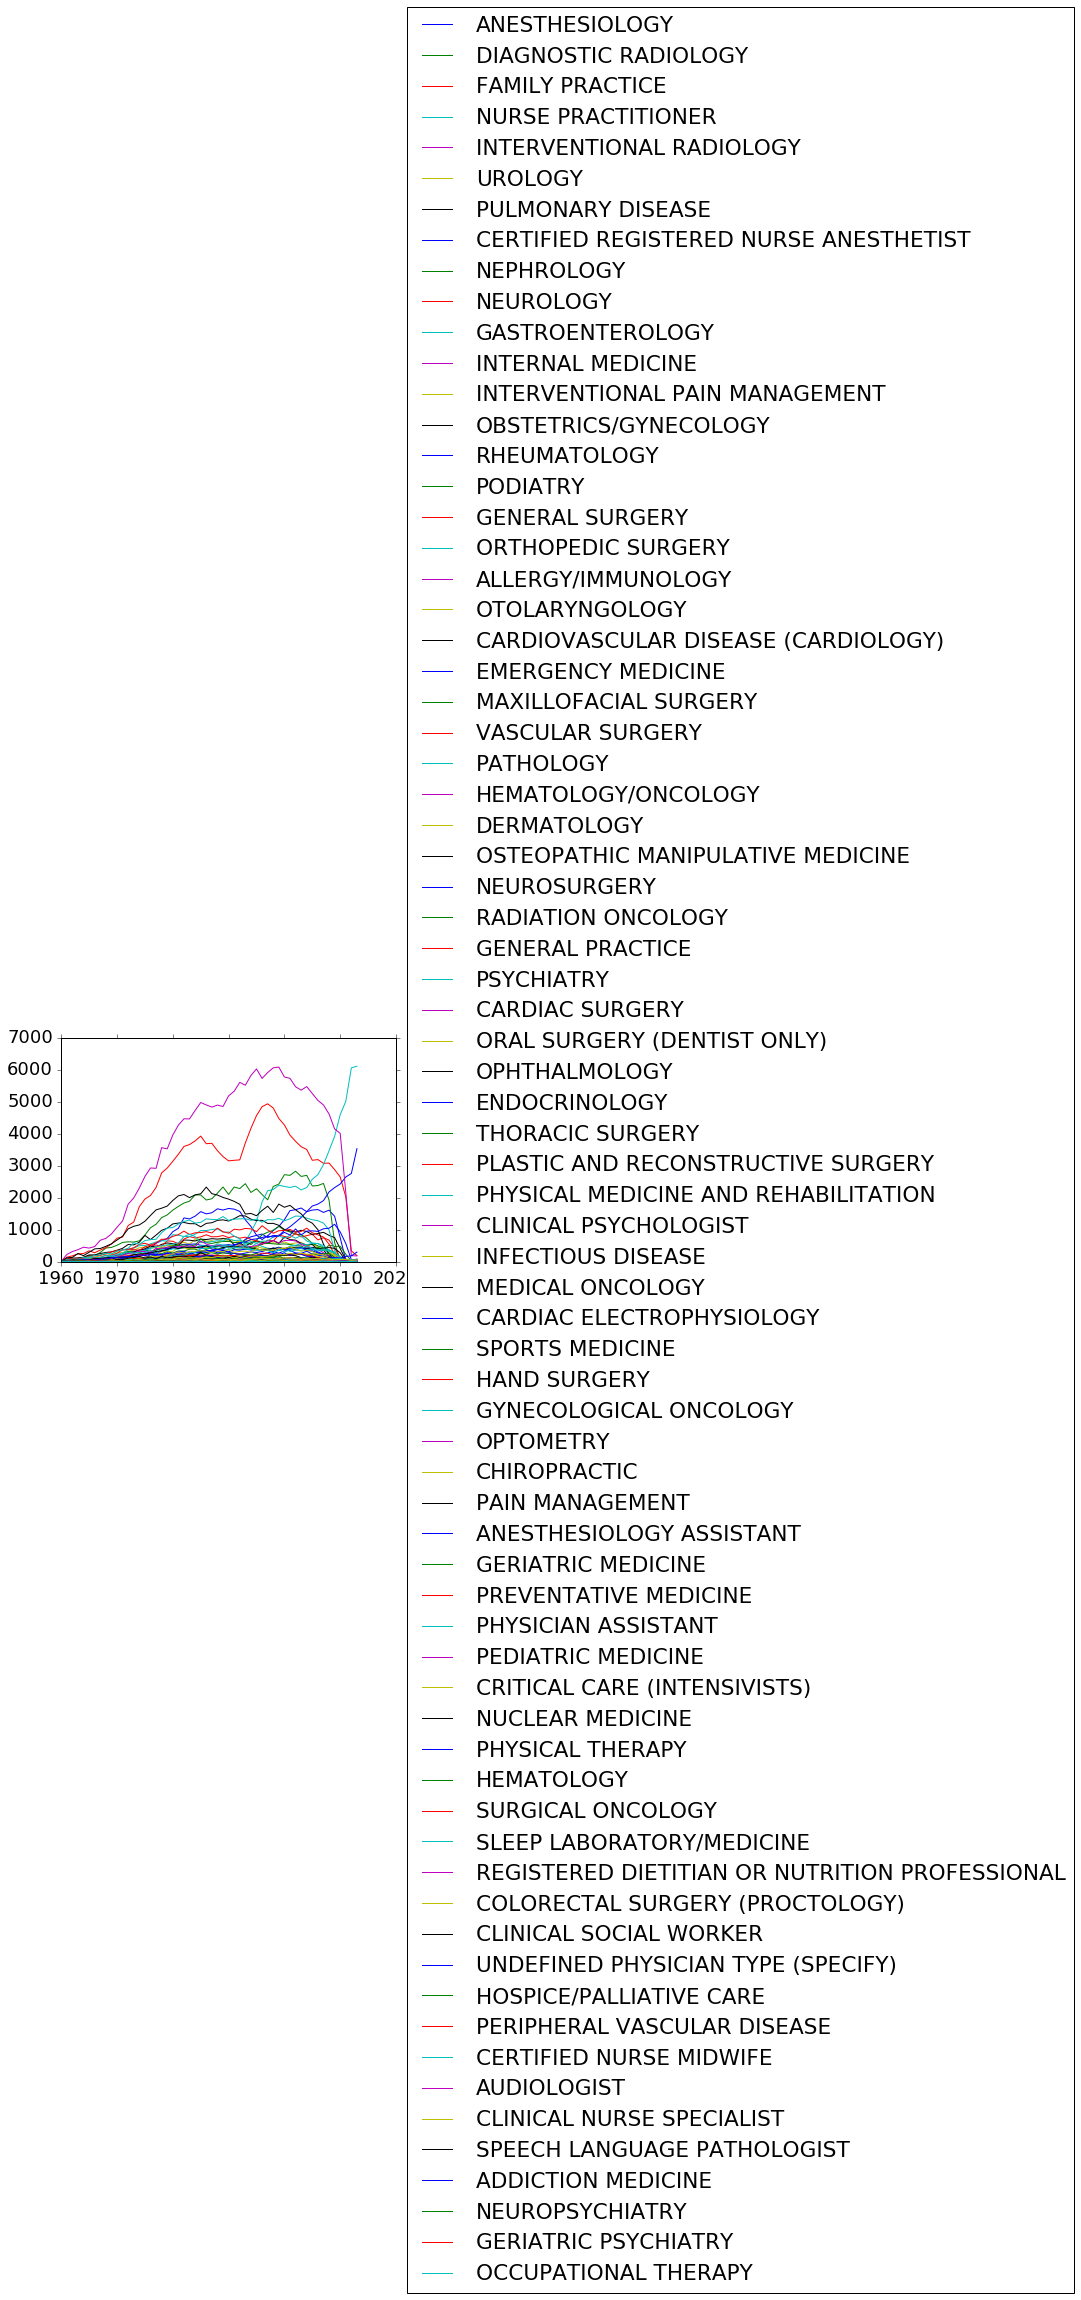

In [257]:
# http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# http://matplotlib.org/users/legend_guide.html
# Place a legend to the right

# Now plot all those curves 
plt.clf()

nrows, ncols = graduation_hist_df.shape

for i in np.arange(ncols):
    plt.plot(graduation_hist_df.ix[my_bins_1_years[0:len(my_bins_1_years)-1], i])
    print('Plotted i =', str(i))
    # Place a legend to the right

print('Last specialty plotted = ', )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [253]:
graduation_hist_df.columns.values

array(['ANESTHESIOLOGY', 'DIAGNOSTIC RADIOLOGY', 'FAMILY PRACTICE',
       'NURSE PRACTITIONER', 'INTERVENTIONAL RADIOLOGY', 'UROLOGY',
       'PULMONARY DISEASE', 'CERTIFIED REGISTERED NURSE ANESTHETIST',
       'NEPHROLOGY', 'NEUROLOGY', 'GASTROENTEROLOGY', 'INTERNAL MEDICINE',
       'INTERVENTIONAL PAIN MANAGEMENT', 'OBSTETRICS/GYNECOLOGY',
       'RHEUMATOLOGY', 'PODIATRY', 'GENERAL SURGERY', 'ORTHOPEDIC SURGERY',
       'ALLERGY/IMMUNOLOGY', 'OTOLARYNGOLOGY',
       'CARDIOVASCULAR DISEASE (CARDIOLOGY)', 'EMERGENCY MEDICINE',
       'MAXILLOFACIAL SURGERY', 'VASCULAR SURGERY', 'PATHOLOGY',
       'HEMATOLOGY/ONCOLOGY', 'DERMATOLOGY',
       'OSTEOPATHIC MANIPULATIVE MEDICINE', 'NEUROSURGERY',
       'RADIATION ONCOLOGY', 'GENERAL PRACTICE', 'PSYCHIATRY',
       'CARDIAC SURGERY', 'ORAL SURGERY (DENTIST ONLY)', 'OPHTHALMOLOGY',
       'ENDOCRINOLOGY', 'THORACIC SURGERY',
       'PLASTIC AND RECONSTRUCTIVE SURGERY',
       'PHYSICAL MEDICINE AND REHABILITATION', 'CLINICAL PSYCHOLOG

In [254]:
len(graduation_hist_df.columns.values)

74

In [255]:
nrows, ncols = graduation_hist_df.shape

In [256]:
ncols

74

In [258]:
# The above verifies that we plotted all the columns in the dataframe

In [259]:
# 9/14/16: Normalize the data next

In [ ]:
# This notebook is cleaned up and continued as 2016-09-14-graduation-years_ravi
